# 20180408 Project Details

### Remarks: Ctrl + F and search keyword = 20180329 for project background that I sent it to you before submitting project proposal

# Classes have been designed to manage datasets and algorithm logic
## superclass: dataset

### subclass:trainset
### subclass:testset
### subclass:masterset
    
## superclass: Experiment
### subclass:DTWExperiment

In [11]:
import pandas as pd
import math

class dataset(object):
    def __init__(self, data):
        self._data = data
    
    def get_data(self):
        return self._data
    
    def get_data_by_rows(self, no_of_rows):
        return self._data[0:no_of_rows]
    
    
    def data_cleaning(self):
        
#         print('before dropping na', self._data.shape)
#         self._data.dropna(axis = 0, how='any', inplace = True)
#         print('after dropping na', self._data.shape)
        
        print('before cleaning', self._data.Label.unique())
        self._data = self._data[self._data['Label'] != 0]
        print('after cleaning', self._data.Label.unique())


        
    def data_selected_features(self, selectedFeatures):
        print('before features selected', self._data.columns.unique())
        self._data = self._data[selectedFeatures]
        print('after features selected', self._data.columns.unique())
        
    
    def data_selected_labels(self, selectedLabels):
        print('before labels selected', self._data.Label.unique())
        self._data = self._data[self._data['Label'].isin(selectedLabels)]
        print('after labels selected', self._data.Label.unique())

        
    def get_selected_labels(self):
        return self._data['Label'].unique()
    
    def get_selected_subjects(self):
        return self._data['Subject'].unique()
    
    
    def get_XY(self):
        X = self._data.drop(['Label','Subject'], axis = 1)
        Y = self._data['Label']
        
        return X, Y
    
    def get_X_by_subject_label(self, subject, label, no_of_rows):
        X = self._data[(self._data['Subject']==subject) & (self._data['Label']==label)][0:no_of_rows]
        X = X.drop(['Label','Subject'], axis = 1)

        return X
    
    def get_X_by_subject_label(self, subject, label, subsample):
        X = self._data[(self._data['Subject']==subject) & (self._data['Label']==label)][::subsample]
        X = X.drop(['Label','Subject'], axis = 1)

        return X
    
    def get_X_by_label(self, label, no_of_rows):
        X = self._data[self._data['Label']==label][0:no_of_rows]
        X = X.drop(['Label','Subject'], axis = 1)

        return X
    
    def get_X_by_label(self, label, subsample):
        X = self._data[self._data['Label']==label][::subsample]
        X = X.drop(['Label','Subject'], axis = 1)

        return X
    
    def get_subject(self):
        return self._data['Subject']
    
    def set_data(self, data):
        self._data = data
    
#     def exportToCSV(self, file_name):
#         self._data.to_csv(file_name, index = False)
    
    
    def addThetaColumns(self, columnName):
        thetaXZ, thetaYZ = self.getThetaColumns(columnName)
        self._data[columnName + 'ThetaXZ'] = thetaXZ
        self._data[columnName + 'ThetaYZ'] = thetaYZ
        
    def addAllThetaColumns(self):
        self.addThetaColumns('AccelerationChest')
        self.addThetaColumns('AccelerationAnkle')
        self.addThetaColumns('GyroAnkle')
        self.addThetaColumns('MagnetometerAnkle')
        self.addThetaColumns('AccelerationArm')
        self.addThetaColumns('GyroArm')
        self.addThetaColumns('MagnetometerArm')
        
    
    def getThetaColumns(self, columnName):
        thetaXZ = []
        thetaYZ = []
        for row in range(0, self.get_data().shape[0]):
#             print(row)
            x = self.get_data()[columnName + 'X'].iloc[row]
            y = self.get_data()[columnName + 'Y'].iloc[row]
            z = self.get_data()[columnName + 'Z'].iloc[row]
            
            
#             print(x)
#             print(y)
#             print(z)
            
            tempThetaXZ, tempThetaYZ = self.convertToAngles(x, y, z)
            thetaXZ.append(tempThetaXZ)
            thetaYZ.append(tempThetaYZ)
#             print(thetaXZ[row])
#             print(thetaYZ[row])
        
        return thetaXZ, thetaYZ
    
# = ["AccelerationChestX"
# , "AccelerationChestY"
# , "AccelerationChestZ"
# , "ElectrocardiogramLead1"
# , "ElectrocardiogramLead2"
# , "AccelerationAnkleX"
# , "AccelerationAnkleY"
# , "AccelerationAnkleZ"
# , "GyroAnkleX"
# , "GyroAnkleY"
# , "GyroAnkleZ"
#                 , "MagnetometerAnkleX"
#                 , "MagnetometerAnkleY"
#                 , "MagnetometerAnkleZ"
# , "AccelerationArmX"
# , "AccelerationArmY"
# , "AccelerationArmZ"
# , "GyroArmX"
# , "GyroArmY"
# , "GyroArmZ"
# , "MagnetometerArmX"
# , "MagnetometerArmY"
# , "MagnetometerArmZ"
# , "Label"
# ]

    def unit_vector(self, vector):
        """ Returns the unit vector of the vector.  """
        return vector / np.linalg.norm(vector)

    
    def angle_between(self, v1, v2):
        """ Returns the angle in radians between vectors 'v1' and 'v2'::

                >>> angle_between((1, 0, 0), (0, 1, 0))
                1.5707963267948966
                >>> angle_between((1, 0, 0), (1, 0, 0))
                0.0
                >>> angle_between((1, 0, 0), (-1, 0, 0))
                3.141592653589793
        """
        v1_u = self.unit_vector(v1)
        v2_u = self.unit_vector(v2)
        return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

    
    def convertToAngles(self, x, y, z):
        # X-Z Plane, v2.Y must be zero
        v1 = [x, y, z]
        v2 = [x, 0, z]

        if y >= 0 and z >= 0:
            thetaXZ = math.degrees(self.angle_between(v1, v2))
        elif y >= 0 and z <= 0:
            thetaXZ = 180 - math.degrees(self.angle_between(v1, v2))   
        elif y <= 0 and z <= 0:
            thetaXZ = 180 + math.degrees(self.angle_between(v1, v2))
        elif y <= 0 and z >= 0:
            thetaXZ = 360 - math.degrees(self.angle_between(v1, v2))


        # Y-Z Plane, v2.X must be zero
        v1 = [x, y, z]
        v2 = [0, y, z]

        if x >= 0 and z >= 0:
            thetaYZ = math.degrees(self.angle_between(v1, v2))
        elif x >= 0 and z <= 0:
            thetaYZ = 180 - math.degrees(self.angle_between(v1, v2))   
        elif x <= 0 and z <= 0:
            thetaYZ = 180 + math.degrees(self.angle_between(v1, v2))
        elif x <= 0 and z >= 0:
            thetaYZ = 360 - math.degrees(self.angle_between(v1, v2))

        return thetaXZ, thetaYZ

In [12]:
class trainset(dataset):
    def __init__(self):
        
        for i in range(1, 9):
            subject = pd.read_csv('mHealth_subject' + str(i) + '.log', sep="\t", header=None)
            subject.columns = ["AccelerationChestX"
                            , "AccelerationChestY"
                            , "AccelerationChestZ"
                            , "ElectrocardiogramLead1"
                            , "ElectrocardiogramLead2"
                            , "AccelerationAnkleX"
                            , "AccelerationAnkleY"
                            , "AccelerationAnkleZ"
                            , "GyroAnkleX"
                            , "GyroAnkleY"
                            , "GyroAnkleZ"
                            , "MagnetometerAnkleX"
                            , "MagnetometerAnkleY"
                            , "MagnetometerAnkleZ"
                            , "AccelerationArmX"
                            , "AccelerationArmY"
                            , "AccelerationArmZ"
                            , "GyroArmX"
                            , "GyroArmY"
                            , "GyroArmZ"
                            , "MagnetometerArmX"
                            , "MagnetometerArmY"
                            , "MagnetometerArmZ"
                            , "Label"
                           ]

            print(i)
            if i == 1:
                subject['Subject'] = i
                train_subjects = subject
            else:
                subject['Subject'] = i
                train_subjects = pd.concat([train_subjects, subject])

        
        
        super().__init__(train_subjects)

In [13]:
class testset(dataset):
    def __init__(self, subject_index_list):
        count = 0
        for i in subject_index_list:
            count = count + 1
            subject = pd.read_csv('mHealth_subject' + str(i) + '.log', sep="\t", header=None)
            subject.columns = ["AccelerationChestX"
                            , "AccelerationChestY"
                            , "AccelerationChestZ"
                            , "ElectrocardiogramLead1"
                            , "ElectrocardiogramLead2"
                            , "AccelerationAnkleX"
                            , "AccelerationAnkleY"
                            , "AccelerationAnkleZ"
                            , "GyroAnkleX"
                            , "GyroAnkleY"
                            , "GyroAnkleZ"
                            , "MagnetometerAnkleX"
                            , "MagnetometerAnkleY"
                            , "MagnetometerAnkleZ"
                            , "AccelerationArmX"
                            , "AccelerationArmY"
                            , "AccelerationArmZ"
                            , "GyroArmX"
                            , "GyroArmY"
                            , "GyroArmZ"
                            , "MagnetometerArmX"
                            , "MagnetometerArmY"
                            , "MagnetometerArmZ"
                            , "Label"
                           ]

            print(i)
            subject['Subject'] = i
            
            if count == 1:    
                test_subjects = subject
            else:
                test_subjects = pd.concat([test_subjects, subject])
        
            
        super().__init__(test_subjects)

In [14]:
class masterset(dataset):
    def __init__(self, subject_index_list):
        count = 0
        for i in subject_index_list:
            count = count + 1
            subject = pd.read_csv('mHealth_subject' + str(i) + '.log', sep="\t", header=None)
            subject.columns = ["AccelerationChestX"
                            , "AccelerationChestY"
                            , "AccelerationChestZ"
                            , "ElectrocardiogramLead1"
                            , "ElectrocardiogramLead2"
                            , "AccelerationAnkleX"
                            , "AccelerationAnkleY"
                            , "AccelerationAnkleZ"
                            , "GyroAnkleX"
                            , "GyroAnkleY"
                            , "GyroAnkleZ"
                            , "MagnetometerAnkleX"
                            , "MagnetometerAnkleY"
                            , "MagnetometerAnkleZ"
                            , "AccelerationArmX"
                            , "AccelerationArmY"
                            , "AccelerationArmZ"
                            , "GyroArmX"
                            , "GyroArmY"
                            , "GyroArmZ"
                            , "MagnetometerArmX"
                            , "MagnetometerArmY"
                            , "MagnetometerArmZ"
                            , "Label"
                           ]

            
            print(i)
            subject['Subject'] = i

            if count == 1:
                train_subjects = subject
            else:
                train_subjects = pd.concat([train_subjects, subject])

        super().__init__(train_subjects)

In [15]:
class exportset(dataset):
    def __init__(self, subject_index):
        
#         for i in range(1, 9):
        subject = pd.read_csv('mHealth_subject' + str(subject_index) + '.log', sep="\t", header=None)
        subject.columns = ["AccelerationChestX"
                        , "AccelerationChestY"
                        , "AccelerationChestZ"
                        , "ElectrocardiogramLead1"
                        , "ElectrocardiogramLead2"
                        , "AccelerationAnkleX"
                        , "AccelerationAnkleY"
                        , "AccelerationAnkleZ"
                        , "GyroAnkleX"
                        , "GyroAnkleY"
                        , "GyroAnkleZ"
                        , "MagnetometerAnkleX"
                        , "MagnetometerAnkleY"
                        , "MagnetometerAnkleZ"
                        , "AccelerationArmX"
                        , "AccelerationArmY"
                        , "AccelerationArmZ"
                        , "GyroArmX"
                        , "GyroArmY"
                        , "GyroArmZ"
                        , "MagnetometerArmX"
                        , "MagnetometerArmY"
                        , "MagnetometerArmZ"
                        , "Label"
                       ]

#             print(i)
#             if i == 1:
        subject['Subject'] = subject_index
        train_subjects = subject
#             else:
#                 subject['Subject'] = i
#                 train_subjects = pd.concat([train_subjects, subject])

        super().__init__(train_subjects)

In [16]:
class importset(dataset):
    def __init__(self, subject_index_list):
        
        count = 0
        for i in subject_index_list:
            print('importing subject = ', i)
            count = count + 1
            subject = pd.read_csv('subject' + str(i) + '.csv')

            if count == 1:
                train_subjects = subject
            else:
                train_subjects = pd.concat([train_subjects, subject])

        super().__init__(train_subjects)

In [17]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Experiment(object):
    def __init__(self, masterset, testset):
        self._masterset = masterset
        self._testset = testset
        self._masterset_copy = masterset
        self._testset_copy = testset
        
    def restoringDataset(self):
        self._masterset = self._masterset_copy
        self._testset = self._testset_copy
    
    def get_masterset(self):
        return self._masterset
    
    def get_testset(self):
        return self._testset
    
    def Scaling(self, preprocessor):
        X_train, y_train = self._masterset.get_XY()
        X_test, y_test = self._testset.get_XY()
        
        preprocessor.fit(X_train)
        
        X_train_scaled = pd.DataFrame(preprocessor.transform(X_train))
        X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))
        
        X_train_scaled.columns = list(self._masterset.get_data().drop(['Label','Subject'], axis = 1).columns.values)
        X_test_scaled.columns = list(self._testset.get_data().drop(['Label','Subject'], axis = 1).columns.values)
        
        print(X_train_scaled.shape)
        print(self._masterset.get_subject().shape)
        X_train_scaled['Subject'] = list(self._masterset.get_subject())
        X_train_scaled['Label'] = list(y_train)
        
        self._masterset.set_data(X_train_scaled)
        self._masterset.get_data()
        
        X_test_scaled['Subject'] = list(self._testset.get_subject())
        X_test_scaled['Label'] = list(y_test)
        
        self._testset.set_data(X_test_scaled)
        self._testset.get_data()
    
    
    
    def doPCA(self, data, dimensions=2):

        model = PCA(n_components=dimensions)
        model.fit(data)
        print(model.explained_variance_ratio_)
        print(model.explained_variance_)
        print ("Cummulative Variance Explained = ", (np.sum(model.explained_variance_ratio_)))

        print(model.explained_variance_)

        plt.plot(np.cumsum(model.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance');
        
        
        suggestedDimensions = 0
        for suggestedDimensions in range(0, len(model.explained_variance_)):
            if model.explained_variance_[suggestedDimensions] >= 1:
                suggestedDimensions = suggestedDimensions + 1
                print('suggestedDimensions',suggestedDimensions)
            else:
                suggestedDimensions = suggestedDimensions - 1
                print('suggestedDimensions',suggestedDimensions)
                break

        # print "Suggested Dimensions = %d" % suggestedDimensions

        return suggestedDimensions, model
    
    
    
    def ReducingDimensionByPCA(self):
        X_train, y_train = self._masterset.get_XY()
        X_test, y_test = self._testset.get_XY()
        
        suggestedDimensions, pca = self.doPCA(data = X_train, dimensions = X_train.shape[1])
        suggestedDimensions, pca = self.doPCA(data = X_train, dimensions = suggestedDimensions)
        
        X_train_trans = pd.DataFrame(pca.transform(X_train))
        X_test_trans = pd.DataFrame(pca.transform(X_test))
        
#         preprocessor.fit(X_train)
        
#         X_train_scaled = pd.DataFrame(preprocessor.transform(X_train))
#         X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))
        
#         X_train_scaled.columns = list(self._masterset.get_data().drop(['Label','Subject'], axis = 1).columns.values)
#         X_test_scaled.columns = list(self._testset.get_data().drop(['Label','Subject'], axis = 1).columns.values)
        
    
        print(X_train_trans.shape)
        print(self._masterset.get_subject().shape)
        X_train_trans['Subject'] = list(self._masterset.get_subject())
        X_train_trans['Label'] = list(y_train)
        
        self._masterset.set_data(X_train_trans)
        self._masterset.get_data()
        
        X_test_trans['Subject'] = list(self._testset.get_subject())
        X_test_trans['Label'] = list(y_test)
        
        self._testset.set_data(X_test_trans)
        self._testset.get_data()
    
    

In [18]:
# import numpy as np
# from scipy.spatial.distance import euclidean
# from fastdtw import fastdtw
# from collections import Counter


# class DTWExperiment(Experiment):
#     def __init__(self, master, test):
#         super().__init__(master, test)
        
#     def classifyOneMovementWithoutSelectMasterSubject(self, testsubject_index, testsubject_action_index, no_of_rows):
#         dtw_result = []
# #         no_of_rows = 10000
# #         testsubject_action_index = 10

#         for master_action_index in range(1, 13):
#             X_master = self._masterset.get_X_by_label(master_action_index, no_of_rows)
#             X_test = self._testset.get_X_by_subject_label(testsubject_index, testsubject_action_index, no_of_rows)
            
#             distance, path = fastdtw(X_master, X_test, dist=euclidean)
#             dtw_result.append((testsubject_index, testsubject_action_index, master_action_index, distance))

#         dtw_result_df = pd.DataFrame(list(dtw_result), columns = ['TestSubject', 'TestSubjectAction', 'MasterSetAction', 'Distance'])

#         isMinDistance = np.zeros(len(dtw_result_df))
#         isCorrect = np.zeros(len(dtw_result_df))

#         for row_index in range(0, 12):
#         #     print(dtw_result_df.iloc[row_index]['Distance'])

#             if dtw_result_df.iloc[row_index]['Distance'] == dtw_result_df['Distance'].min():
#                 isMinDistance[row_index] = 1
#                 if dtw_result_df.iloc[row_index]['TestSubjectAction'] == dtw_result_df.iloc[row_index]['MasterSetAction']:
#                     isCorrect[row_index] = 1

#         dtw_result_df['isMinDistance'] = isMinDistance
#         dtw_result_df['isCorrect'] = isCorrect
        
#         return dtw_result_df
    
    
#     def classifyOneMovement(self, mastersubject_index, testsubject_index, testsubject_action_index, no_of_rows):
#         dtw_result = []
# #         no_of_rows = 10000
# #         testsubject_action_index = 10

#         for master_action_index in self._masterset.get_selected_labels():
# #             X_master = self._masterset.get_X_by_label(master_action_index, no_of_rows)
#             X_master = self._masterset.get_X_by_subject_label(mastersubject_index, master_action_index, no_of_rows)            
#             X_test = self._testset.get_X_by_subject_label(testsubject_index, testsubject_action_index, no_of_rows)
            
#             distance, path = fastdtw(X_master, X_test, dist=euclidean)
#             dtw_result.append((mastersubject_index, testsubject_index, testsubject_action_index, master_action_index, distance))

#         dtw_result_df = pd.DataFrame(list(dtw_result), columns = ['MasterSubject', 'TestSubject', 'TestSubjectAction', 'MasterSetAction', 'Distance'])

#         isMinDistance = np.zeros(len(dtw_result_df))
#         isCorrect = np.zeros(len(dtw_result_df))

#         for row_index in range(0, len(self._masterset.get_selected_labels())):

#             if dtw_result_df.iloc[row_index]['Distance'] == dtw_result_df['Distance'].min():
#                 isMinDistance[row_index] = 1
#                 if dtw_result_df.iloc[row_index]['TestSubjectAction'] == dtw_result_df.iloc[row_index]['MasterSetAction']:
#                     isCorrect[row_index] = 1

#         dtw_result_df['isMinDistance'] = isMinDistance
#         dtw_result_df['isCorrect'] = isCorrect
        
#         return dtw_result_df
    
#     def classifyOneMovementByAllMasterSubjects(self, testsubject_index, testsubject_action_index, no_of_rows):
#         count = 0
#         for mastersubject_index in self._masterset.get_selected_subjects():
#             count = count + 1
#             tempDf = self.classifyOneMovement(mastersubject_index, testsubject_index, testsubject_action_index, no_of_rows)
            
#             if count == 1:
#                 resultDf = tempDf
#             else:
#                 resultDf = pd.concat([resultDf, tempDf])
                
#         return resultDf
            
#     def predictOneMovementByVoting(self, testsubject_index, testsubject_action_index, no_of_rows):
#         resultDf = self.classifyOneMovementByAllMasterSubjects(testsubject_index, testsubject_action_index, no_of_rows)
        
#         c = Counter(resultDf[resultDf['isMinDistance'] == 1]['MasterSetAction'])
#         freq = c.most_common(8)
#         predictedAction = freq[0][0]
        
#         if testsubject_action_index == predictedAction:
#             predictedResult = True
#         else:
#             predictedResult = False
        
#         return predictedAction, predictedResult
    
#     def predictOneMovement(self, testsubject_index, testsubject_action_index, no_of_rows):
#         resultDf = self.classifyOneMovementByAllMasterSubjects(testsubject_index, testsubject_action_index, no_of_rows)
        
# #         c = Counter(resultDf[resultDf['isMinDistance'] == 1]['MasterSetAction'])
# #         freq = c.most_common(8)
# #         predictedAction = freq[0][0]
        
#         predictedAction = resultDf[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean().idxmin().values[0]
        
# #         print(testsubject_action_index)
# #         print(predictedAction)
# #         print(testsubject_action_index == predictedAction)
#         if testsubject_action_index == predictedAction:
#             predictedResult = True
#         else:
#             predictedResult = False
        
#         return predictedAction, predictedResult
   


#  #     def PredictAllMovements(self
# #                            , start_test_subject_index
# #                            , end_test_subject_index
# #                            , start_test_subject_action_index
# #                            , end_test_subject_action_index
# #                            , no_of_rows):
# # #         no_of_rows = 100

# #         predicted_all = []

# #         for testsubject_index in range(start_test_subject_index, end_test_subject_index + 1):
# #             for testsubject_action_index in range(start_test_subject_action_index, end_test_subject_action_index + 1):
# #                 predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index
# #                                                                                       , testsubject_action_index
# #                                                                                       , no_of_rows)

# #                 predicted_all.append((testsubject_index, testsubject_action_index, predictedAction, predictedResult))
        
# #         resultDf = pd.DataFrame(list(predicted_all), columns = ['TestSubject', 'ActualAction', 'PredictedAction', 'Result'])
# #         accuracy = len(resultDf[resultDf['Result']==True]) * 1.0 / len(resultDf)
        
# #         return resultDf, accuracy
    
#     def PredictAllMovements(self
#                            , test_subject_index_list
#                            , test_subject_action_index_list
#                            , no_of_rows):
# #         no_of_rows = 100

#         predicted_all = []

#         for testsubject_index in test_subject_index_list:
#             for testsubject_action_index in test_subject_action_index_list:
#                 predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index
#                                                                                       , testsubject_action_index
#                                                                                       , no_of_rows)

#                 predicted_all.append((testsubject_index, testsubject_action_index, predictedAction, predictedResult))
        
#         resultDf = pd.DataFrame(list(predicted_all), columns = ['TestSubject', 'ActualAction', 'PredictedAction', 'Result'])
#         accuracy = len(resultDf[resultDf['Result']==True]) * 1.0 / len(resultDf)
        
#         return resultDf, accuracy
    

In [19]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from collections import Counter


class DTWExperiment(Experiment):
    def __init__(self, master, test):
        super().__init__(master, test)
        
    def classifyOneMovementWithoutSelectMasterSubject(self, testsubject_index, testsubject_action_index, subsample):
        dtw_result = []
#         no_of_rows = 10000
#         testsubject_action_index = 10

        for master_action_index in range(1, 13):
            X_master = self._masterset.get_X_by_label(master_action_index, subsample)
            X_test = self._testset.get_X_by_subject_label(testsubject_index, testsubject_action_index, subsample)
            
            distance, path = fastdtw(X_master, X_test, dist=euclidean)
            dtw_result.append((testsubject_index, testsubject_action_index, master_action_index, distance))

        dtw_result_df = pd.DataFrame(list(dtw_result), columns = ['TestSubject', 'TestSubjectAction', 'MasterSetAction', 'Distance'])

        isMinDistance = np.zeros(len(dtw_result_df))
        isCorrect = np.zeros(len(dtw_result_df))

        for row_index in range(0, 12):
        #     print(dtw_result_df.iloc[row_index]['Distance'])

            if dtw_result_df.iloc[row_index]['Distance'] == dtw_result_df['Distance'].min():
                isMinDistance[row_index] = 1
                if dtw_result_df.iloc[row_index]['TestSubjectAction'] == dtw_result_df.iloc[row_index]['MasterSetAction']:
                    isCorrect[row_index] = 1

        dtw_result_df['isMinDistance'] = isMinDistance
        dtw_result_df['isCorrect'] = isCorrect
        
        return dtw_result_df
    
    
    def classifyOneMovement(self, mastersubject_index, testsubject_index, testsubject_action_index, subsample):
        dtw_result = []
#         no_of_rows = 10000
#         testsubject_action_index = 10

        for master_action_index in self._masterset.get_selected_labels():
#             X_master = self._masterset.get_X_by_label(master_action_index, no_of_rows)
            X_master = self._masterset.get_X_by_subject_label(mastersubject_index, master_action_index, subsample)            
            X_test = self._testset.get_X_by_subject_label(testsubject_index, testsubject_action_index, subsample)
            
            distance, path = fastdtw(X_master, X_test, dist=euclidean)
            dtw_result.append((mastersubject_index, testsubject_index, testsubject_action_index, master_action_index, distance))

        dtw_result_df = pd.DataFrame(list(dtw_result), columns = ['MasterSubject', 'TestSubject', 'TestSubjectAction', 'MasterSetAction', 'Distance'])

        isMinDistance = np.zeros(len(dtw_result_df))
        isCorrect = np.zeros(len(dtw_result_df))

        for row_index in range(0, len(self._masterset.get_selected_labels())):

            if dtw_result_df.iloc[row_index]['Distance'] == dtw_result_df['Distance'].min():
                isMinDistance[row_index] = 1
                if dtw_result_df.iloc[row_index]['TestSubjectAction'] == dtw_result_df.iloc[row_index]['MasterSetAction']:
                    isCorrect[row_index] = 1

        dtw_result_df['isMinDistance'] = isMinDistance
        dtw_result_df['isCorrect'] = isCorrect
        
        return dtw_result_df
    
    def classifyOneMovementByAllMasterSubjects(self, testsubject_index, testsubject_action_index, subsample):
        count = 0
        for mastersubject_index in self._masterset.get_selected_subjects():
            count = count + 1
            tempDf = self.classifyOneMovement(mastersubject_index, testsubject_index, testsubject_action_index, subsample)
            
            if count == 1:
                resultDf = tempDf
            else:
                resultDf = pd.concat([resultDf, tempDf])
                
        return resultDf
            
    def predictOneMovementByVoting(self, testsubject_index, testsubject_action_index, subsample):
        resultDf = self.classifyOneMovementByAllMasterSubjects(testsubject_index, testsubject_action_index, subsample)
        
        c = Counter(resultDf[resultDf['isMinDistance'] == 1]['MasterSetAction'])
        freq = c.most_common(8)
        predictedAction = freq[0][0]
        
        if testsubject_action_index == predictedAction:
            predictedResult = True
        else:
            predictedResult = False
        
        return predictedAction, predictedResult
    
    def predictOneMovement(self, testsubject_index, testsubject_action_index, subsample):
        resultDf = self.classifyOneMovementByAllMasterSubjects(testsubject_index, testsubject_action_index, subsample)
        
#         c = Counter(resultDf[resultDf['isMinDistance'] == 1]['MasterSetAction'])
#         freq = c.most_common(8)
#         predictedAction = freq[0][0]
        
        predictedAction = resultDf[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean().idxmin().values[0]
        
#         print(testsubject_action_index)
#         print(predictedAction)
#         print(testsubject_action_index == predictedAction)
        if testsubject_action_index == predictedAction:
            predictedResult = True
        else:
            predictedResult = False
        
        return predictedAction, predictedResult
   


 #     def PredictAllMovements(self
#                            , start_test_subject_index
#                            , end_test_subject_index
#                            , start_test_subject_action_index
#                            , end_test_subject_action_index
#                            , no_of_rows):
# #         no_of_rows = 100

#         predicted_all = []

#         for testsubject_index in range(start_test_subject_index, end_test_subject_index + 1):
#             for testsubject_action_index in range(start_test_subject_action_index, end_test_subject_action_index + 1):
#                 predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index
#                                                                                       , testsubject_action_index
#                                                                                       , no_of_rows)

#                 predicted_all.append((testsubject_index, testsubject_action_index, predictedAction, predictedResult))
        
#         resultDf = pd.DataFrame(list(predicted_all), columns = ['TestSubject', 'ActualAction', 'PredictedAction', 'Result'])
#         accuracy = len(resultDf[resultDf['Result']==True]) * 1.0 / len(resultDf)
        
#         return resultDf, accuracy
    
    def PredictAllMovements(self
                           , test_subject_index_list
                           , test_subject_action_index_list
                           , subsample):
#         no_of_rows = 100

        predicted_all = []

        for testsubject_index in test_subject_index_list:
            for testsubject_action_index in test_subject_action_index_list:
                predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index
                                                                                      , testsubject_action_index
                                                                                      , subsample)

                predicted_all.append((testsubject_index, testsubject_action_index, predictedAction, predictedResult))
        
        resultDf = pd.DataFrame(list(predicted_all), columns = ['TestSubject', 'ActualAction', 'PredictedAction', 'Result'])
        accuracy = len(resultDf[resultDf['Result']==True]) * 1.0 / len(resultDf)
        
        return resultDf, accuracy
    

# Please do not uncomment and do not run the code

In [20]:
# export1 = exportset(subject_index = 1)
# export1.set_data(export1.get_data_by_rows(10))
# export1.get_data().shape
# export1.addAllThetaColumns()
# export1.exportToCSV('subject1.csv')

In [21]:
# export2 = exportset(subject_index = 2)
# export2.set_data(export2.get_data_by_rows(10))
# export2.get_data().shape
# export2.addAllThetaColumns()
# export2.exportToCSV('subject2.csv')

# Please do not uncomment and do not run the code

In [22]:
# export1 = exportset(subject_index = 1)
# export1.addAllThetaColumns()
# export1.exportToCSV('subject1.csv')

In [23]:
# export2 = exportset(subject_index = 2)
# export2.addAllThetaColumns()
# export2.exportToCSV('subject2.csv')

In [24]:
# export3 = exportset(subject_index = 3)
# export3.addAllThetaColumns()
# export3.exportToCSV('subject3.csv')

In [25]:
# export4 = exportset(subject_index = 4)
# export4.addAllThetaColumns()
# export4.exportToCSV('subject4.csv')

In [26]:
# export5 = exportset(subject_index = 5)
# export5.addAllThetaColumns()
# export5.exportToCSV('subject5.csv')

In [27]:
# export6 = exportset(subject_index = 6)
# export6.addAllThetaColumns()
# export6.exportToCSV('subject6.csv')

In [28]:
# export7 = exportset(subject_index = 7)
# export7.addAllThetaColumns()
# export7.exportToCSV('subject7.csv')

In [29]:
# export8 = exportset(subject_index = 8)
# export8.addAllThetaColumns()
# export8.exportToCSV('subject8.csv')

In [30]:
# export9 = exportset(subject_index = 9)
# export9.addAllThetaColumns()
# export9.exportToCSV('subject9.csv')

In [31]:
# export10 = exportset(subject_index = 10)
# export10.addAllThetaColumns()
# export10.exportToCSV('subject10.csv')

# Initialize master and test dataset objects

# the dataset we use is basically time series data.  In order to keep things in sequence, instead of using splitting methods, we split our train and test set by subjects instead

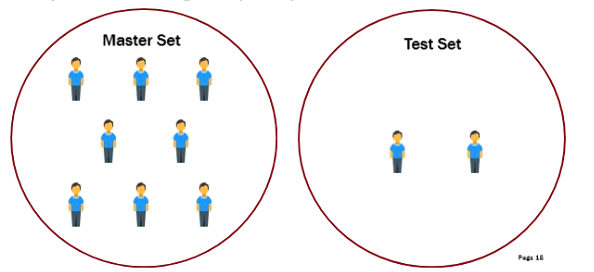

# Default first 8 subjects are used as master set; the rest of 2 subjects are as test set.  (the code is supported to assign selective subjects to master and test set as long as they must be mutually exclusive)

In [32]:
master = masterset(subject_index_list = [1, 2, 3, 4, 5, 6, 7, 8])

1
2
3
4
5
6
7
8


In [33]:
test = testset(subject_index_list = [9, 10])

9
10


# Data cleaning: remove idle action = 0

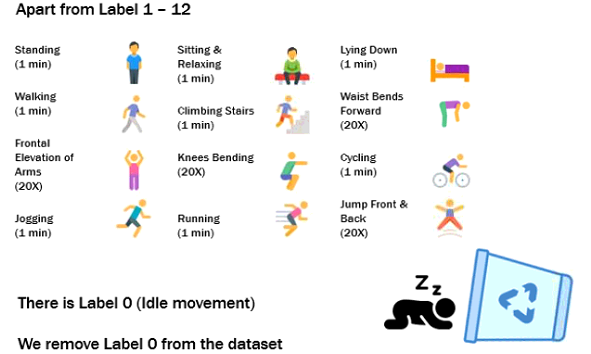

In [34]:
master.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


In [35]:
test.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


# Dataset Description

2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

# masterset and testset rows and columns are as follows: 
### of 25 columns, 23 are features
### Label = subjects movement
### subject = subject identity

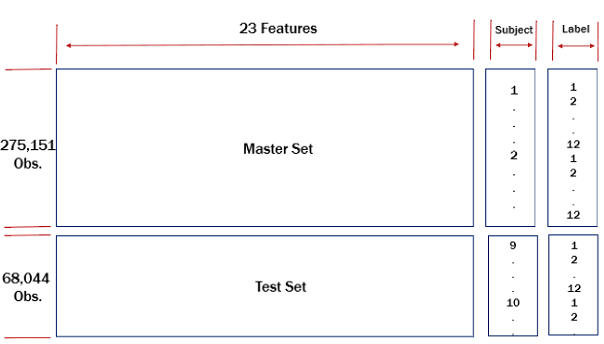

# The code to get dataset descriptive figures is as follows

# Master and test datasets size

In [36]:
master.get_data().shape

(275151, 25)

In [37]:
test.get_data().shape

(68044, 25)

# Original features in master and test sets

In [38]:
master.get_data().columns

Index(['AccelerationChestX', 'AccelerationChestY', 'AccelerationChestZ',
       'ElectrocardiogramLead1', 'ElectrocardiogramLead2',
       'AccelerationAnkleX', 'AccelerationAnkleY', 'AccelerationAnkleZ',
       'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ', 'MagnetometerAnkleX',
       'MagnetometerAnkleY', 'MagnetometerAnkleZ', 'AccelerationArmX',
       'AccelerationArmY', 'AccelerationArmZ', 'GyroArmX', 'GyroArmY',
       'GyroArmZ', 'MagnetometerArmX', 'MagnetometerArmY', 'MagnetometerArmZ',
       'Label', 'Subject'],
      dtype='object')

# You can select any variables you want as features (Label and Subject columns must be included).  All original features in XYZ as well as Label and Subject are selected in our case

In [39]:
master.data_selected_features(['Label', 'Subject','AccelerationChestX', 'AccelerationChestY', 'AccelerationChestZ',
       'ElectrocardiogramLead1', 'ElectrocardiogramLead2',
       'AccelerationAnkleX', 'AccelerationAnkleY', 'AccelerationAnkleZ',
       'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ', 'MagnetometerAnkleX',
       'MagnetometerAnkleY', 'MagnetometerAnkleZ', 'AccelerationArmX',
       'AccelerationArmY', 'AccelerationArmZ', 'GyroArmX', 'GyroArmY',
       'GyroArmZ', 'MagnetometerArmX', 'MagnetometerArmY', 'MagnetometerArmZ'
       ])

before features selected Index(['AccelerationChestX', 'AccelerationChestY', 'AccelerationChestZ',
       'ElectrocardiogramLead1', 'ElectrocardiogramLead2',
       'AccelerationAnkleX', 'AccelerationAnkleY', 'AccelerationAnkleZ',
       'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ', 'MagnetometerAnkleX',
       'MagnetometerAnkleY', 'MagnetometerAnkleZ', 'AccelerationArmX',
       'AccelerationArmY', 'AccelerationArmZ', 'GyroArmX', 'GyroArmY',
       'GyroArmZ', 'MagnetometerArmX', 'MagnetometerArmY', 'MagnetometerArmZ',
       'Label', 'Subject'],
      dtype='object')
after features selected Index(['Label', 'Subject', 'AccelerationChestX', 'AccelerationChestY',
       'AccelerationChestZ', 'ElectrocardiogramLead1',
       'ElectrocardiogramLead2', 'AccelerationAnkleX', 'AccelerationAnkleY',
       'AccelerationAnkleZ', 'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ',
       'MagnetometerAnkleX', 'MagnetometerAnkleY', 'MagnetometerAnkleZ',
       'AccelerationArmX', 'AccelerationArmY', 'Accelerat

In [40]:
test.data_selected_features(['Label', 'Subject','AccelerationChestX', 'AccelerationChestY', 'AccelerationChestZ',
       'ElectrocardiogramLead1', 'ElectrocardiogramLead2',
       'AccelerationAnkleX', 'AccelerationAnkleY', 'AccelerationAnkleZ',
       'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ', 'MagnetometerAnkleX',
       'MagnetometerAnkleY', 'MagnetometerAnkleZ', 'AccelerationArmX',
       'AccelerationArmY', 'AccelerationArmZ', 'GyroArmX', 'GyroArmY',
       'GyroArmZ', 'MagnetometerArmX', 'MagnetometerArmY', 'MagnetometerArmZ'
       ])

before features selected Index(['AccelerationChestX', 'AccelerationChestY', 'AccelerationChestZ',
       'ElectrocardiogramLead1', 'ElectrocardiogramLead2',
       'AccelerationAnkleX', 'AccelerationAnkleY', 'AccelerationAnkleZ',
       'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ', 'MagnetometerAnkleX',
       'MagnetometerAnkleY', 'MagnetometerAnkleZ', 'AccelerationArmX',
       'AccelerationArmY', 'AccelerationArmZ', 'GyroArmX', 'GyroArmY',
       'GyroArmZ', 'MagnetometerArmX', 'MagnetometerArmY', 'MagnetometerArmZ',
       'Label', 'Subject'],
      dtype='object')
after features selected Index(['Label', 'Subject', 'AccelerationChestX', 'AccelerationChestY',
       'AccelerationChestZ', 'ElectrocardiogramLead1',
       'ElectrocardiogramLead2', 'AccelerationAnkleX', 'AccelerationAnkleY',
       'AccelerationAnkleZ', 'GyroAnkleX', 'GyroAnkleY', 'GyroAnkleZ',
       'MagnetometerAnkleX', 'MagnetometerAnkleY', 'MagnetometerAnkleZ',
       'AccelerationArmX', 'AccelerationArmY', 'Accelerat

# First 5 observations of master and test sets

In [41]:
master.get_data().head()

,Label,Subject,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
6656,1,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,-0.73822,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6657,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,-0.88628,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363
6658,1,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,-1.01980,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6659,1,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,-1.17150,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198
6660,1,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,-0.88628,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017


In [42]:
test.get_data().head()

,Label,Subject,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
12288,1,9,-9.4805,-1.7301,-0.10308,-0.753530,-0.502350,0.79065,-9.7829,0.91459,...,-0.44769,-2.7267,-9.0376,1.2356,-0.80784,-0.70226,-0.15302,0.008892,0.88921,-1.8138
12289,1,9,-9.4886,-1.8315,-0.08062,-0.288850,-0.125590,0.80350,-9.9303,1.03240,...,-0.58122,-2.7424,-9.3879,1.2077,-0.80784,-0.70226,-0.15302,-0.174250,0.52807,-1.8138
12290,1,9,-9.9525,-1.8703,0.30536,-0.041863,-0.004186,0.71974,-9.7724,0.97691,...,-0.29787,-2.7871,-8.9777,1.2282,-0.80784,-0.68994,-0.15948,0.366180,0.71146,-1.0828
12291,1,9,-9.5801,-1.8014,-0.15160,0.025118,0.037677,0.75194,-9.9608,0.94698,...,-0.58481,-2.9003,-9.2391,1.0901,-0.80784,-0.68994,-0.15948,0.188370,0.88385,-2.1711
12292,1,9,-9.2542,-1.9377,-0.33229,0.092098,0.092098,0.73087,-9.8915,0.95023,...,-0.44410,-2.9607,-9.2091,1.0916,-0.80784,-0.68994,-0.15948,0.369740,1.06710,-1.8083


# Brief descriptive figures of master and test sets

In [43]:
master.get_data().describe()

,Label,Subject,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
count,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,...,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000
mean,6.169147,4.445130,-7.521110,-0.143850,-0.699136,0.000503,-0.010255,1.812238,-9.061107,-0.719000,...,-0.290972,-3.304465,-5.836086,2.453024,-0.208735,-0.397540,0.379569,-0.507261,1.569891,0.379133
std,3.294922,2.290791,5.756336,2.642278,4.635464,0.902349,0.931583,4.156885,5.181774,6.451024,...,19.615009,5.937592,6.613616,4.288466,0.539642,0.557495,0.519960,34.443681,31.853086,84.864603
min,1.000000,1.000000,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,...,-282.390000,-22.345000,-18.972000,-18.238000,-1.170600,-2.205300,-1.114200,-319.030000,-358.130000,-702.570000
25%,3.000000,2.000000,-9.730100,-1.188600,-3.463450,-0.230250,-0.188380,0.133210,-10.067000,-3.464600,...,-1.798300,-4.897050,-9.587100,0.353010,-0.641180,-0.833680,-0.038793,-6.714850,-7.694150,-12.552000
50%,6.000000,4.000000,-8.831800,-0.290240,-0.642570,-0.075353,-0.050235,1.449700,-9.585400,0.290490,...,-0.297870,-2.300900,-7.748900,1.999100,-0.294120,-0.593430,0.454740,0.358960,0.353650,-0.494730
75%,9.000000,6.000000,-5.347200,0.875830,1.360550,0.175820,0.154890,2.927250,-7.490700,1.811800,...,1.553900,-0.388945,-2.181600,5.234500,0.186270,-0.022587,0.844830,5.524700,9.265950,11.233000
max,12.000000,8.000000,19.094000,20.917000,26.196000,8.506500,8.519100,20.024000,21.161000,25.015000,...,272.560000,19.801000,21.965000,25.741000,1.321600,1.121100,1.528000,234.890000,335.250000,657.180000


In [44]:
test.get_data().describe()

,Label,Subject,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
count,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,...,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000,68044.000000
mean,6.168509,9.495121,-7.340349,-0.129089,-1.906006,0.016370,0.000879,1.776662,-9.063023,-0.633180,...,-0.739776,-4.029430,-5.560494,2.090584,-0.172617,-0.462985,0.385237,-0.635213,0.824676,-1.378418
std,3.314973,0.499980,5.474165,3.360574,4.380268,0.508203,0.448549,4.438221,5.275032,6.483828,...,15.665477,5.664786,6.429193,3.683399,0.586904,0.495348,0.497859,33.280826,22.865112,73.070786
min,1.000000,9.000000,-22.296000,-20.021000,-18.400000,-3.604400,-4.600700,-22.126000,-19.599000,-19.364000,...,-203.550000,-21.905000,-18.928000,-18.216000,-1.060800,-2.256700,-0.870690,-207.920000,-316.230000,-504.800000
25%,3.000000,9.000000,-9.619900,-1.883100,-4.736775,-0.159080,-0.125590,0.226148,-10.052000,-3.582025,...,-1.614625,-5.687100,-9.460075,-0.231200,-0.729410,-0.788500,-0.045259,-4.776800,-5.981300,-10.993000
50%,6.000000,9.000000,-8.583500,-0.303405,-1.813650,-0.066981,-0.046049,0.967950,-9.671100,0.487160,...,-0.442260,-2.927200,-7.700900,1.052400,-0.386270,-0.613960,0.443970,0.362620,0.355690,-0.716510
75%,9.000000,10.000000,-4.636675,1.809825,0.131322,0.129770,0.092098,2.874200,-8.123975,1.930425,...,1.624225,-1.532300,-2.422575,5.865700,0.409800,-0.123200,0.814660,4.213200,5.683050,7.157325
max,12.000000,10.000000,17.618000,20.927000,10.562000,4.081600,4.684500,20.014000,20.766000,24.400000,...,179.730000,19.398000,21.807000,23.974000,1.415700,0.683780,1.377200,239.690000,221.010000,586.080000


# 12 Actions are included in the datasets

In [25]:
master.get_selected_labels()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5], dtype=int64)

In [26]:
test.get_selected_labels()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5], dtype=int64)

In [27]:
print(master.get_data().shape)
print(test.get_data().shape)

(275151, 25)
(68044, 25)


In [28]:
len(master.get_selected_labels())

12

# Number of observations of 12 actions for subject 9 and 10

In [29]:
test.get_data().groupby(by = ['Subject','Label']).count()

AccelerationChestX  AccelerationChestY  AccelerationChestZ  \
Subject Label                                                               
9       1                    3072                3072                3072   
        2                    3072                3072                3072   
        3                    3072                3072                3072   
        4                    3072                3072                3072   
        5                    3072                3072                3072   
        6                    2867                2867                2867   
        7                    2867                2867                2867   
        8                    2969                2969                2969   
        9                    3072                3072                3072   
        10                   3072                3072                3072   
        11                   3072                3072                3072   
        12                   1075                1075                1075   
10      1                    3072                3072                3072   
        2                    3072                3072                3072   
        3                    3072                3072                3072   
        4                    3072                3072                3072   
        5                    3072                3072                3072   
        6                    2458                2458                2458   
        7                    2765                2765                2765   
        8                    2867                2867                2867   
        9                    3072                3072                3072   
        10                   3072                3072                3072   
        11                   3072                3072                3072   
        12                   1024                1024                1024   

               ElectrocardiogramLead1  ElectrocardiogramLead2  \
Subject Label                                                   
9       1                        3072                    3072   
        2                        3072                    3072   
        3                        3072                    3072   
        4                        3072                    3072   
        5                        3072                    3072   
        6                        2867                    2867   
        7                        2867                    2867   
        8                        2969                    2969   
        9                        3072                    3072   
        10                       3072                    3072   
        11                       3072                    3072   
        12                       1075                    1075   
10      1                        3072                    3072   
        2                        3072                    3072   
        3                        3072                    3072   
        4                        3072                    3072   
        5                        3072                    3072   
        6                        2458                    2458   
        7                        2765                    2765   
        8                        2867                    2867   
        9                        3072                    3072   
        10                       3072                    3072   
        11                       3072                    3072   
        12                       1024                    1024   

               AccelerationAnkleX  AccelerationAnkleY  AccelerationAnkleZ  \
Subject Label                                                               
9       1                    3072                3072                3072   
        2                    3072                3072                3072   
        3    

# Dynamic Time Wrapping with Feature Extraction

# we will apply two machine learning technqiues (1. scaling and 2. dimension reduction) to master and test set before performing DTW

## Scaling = Normalization
## Dimension reduction = Principal Component Analysis

# Pass in master and test set to initialize DTW experiment object

In [30]:
dtw_experiment = DTWExperiment(master, test)

# Scaling by normalization

# As you can see, 23 features have different scales e.g. max of MagnetoMeterArmX = 234.89 whereas max of GyroArmX = 1.326 causing machine learning models to baise features those are with larger scales.  Therefore, we rescale all 23 features by a technique of normalization

In [31]:
dtw_experiment.get_masterset().get_data().describe()

,Label,Subject,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
count,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,...,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000,275151.000000
mean,6.169147,4.445130,-7.521110,-0.143850,-0.699136,0.000503,-0.010255,1.812238,-9.061107,-0.719000,...,-0.290972,-3.304465,-5.836086,2.453024,-0.208735,-0.397540,0.379569,-0.507261,1.569891,0.379133
std,3.294922,2.290791,5.756336,2.642278,4.635464,0.902349,0.931583,4.156885,5.181774,6.451024,...,19.615009,5.937592,6.613616,4.288466,0.539642,0.557495,0.519960,34.443681,31.853086,84.864603
min,1.000000,1.000000,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,...,-282.390000,-22.345000,-18.972000,-18.238000,-1.170600,-2.205300,-1.114200,-319.030000,-358.130000,-702.570000
25%,3.000000,2.000000,-9.730100,-1.188600,-3.463450,-0.230250,-0.188380,0.133210,-10.067000,-3.464600,...,-1.798300,-4.897050,-9.587100,0.353010,-0.641180,-0.833680,-0.038793,-6.714850,-7.694150,-12.552000
50%,6.000000,4.000000,-8.831800,-0.290240,-0.642570,-0.075353,-0.050235,1.449700,-9.585400,0.290490,...,-0.297870,-2.300900,-7.748900,1.999100,-0.294120,-0.593430,0.454740,0.358960,0.353650,-0.494730
75%,9.000000,6.000000,-5.347200,0.875830,1.360550,0.175820,0.154890,2.927250,-7.490700,1.811800,...,1.553900,-0.388945,-2.181600,5.234500,0.186270,-0.022587,0.844830,5.524700,9.265950,11.233000
max,12.000000,8.000000,19.094000,20.917000,26.196000,8.506500,8.519100,20.024000,21.161000,25.015000,...,272.560000,19.801000,21.965000,25.741000,1.321600,1.121100,1.528000,234.890000,335.250000,657.180000


In [32]:
dtw_experiment.get_masterset().get_data().describe()[['GyroArmX','MagnetometerArmX']]

,GyroArmX,MagnetometerArmX
count,275151.000000,275151.000000
mean,-0.208735,-0.507261
std,0.539642,34.443681
min,-1.170600,-319.030000
25%,-0.641180,-6.714850
50%,-0.294120,0.358960
75%,0.186270,5.524700
max,1.321600,234.890000


# Normalization will be applied in every column individually by substracting its mean and dividing by its standard deviation (basically it's z-value), so that all features end up to be in same scale.  

## Zij = (Xij – Mean of Xi) / S.D. of Xi

## For details, please see Method dtw_experiment.Scaling() and StandardScaler() in sklearn link below

## http://scikit-learn.org/stable/modules/preprocessing.html

## Remarks: you may get confused by the name "Normalization" and the method StandardScaler() in sklearn.  I have no idea why sklearn named the method as StandardScaler(), but in statistics, we call this as normalization.  So, to be consistent, I think we will just stick to "Normalization"

## https://en.wikipedia.org/wiki/Normalization_(statistics)

In [33]:
dtw_experiment.restoringDataset()

In [34]:
dtw_experiment.Scaling(preprocessing.StandardScaler())

(275151, 23)
(275151,)


# After rescaling, all 23 features are in same scale

In [35]:
dtw_experiment.get_masterset().get_data().head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Subject,Label
0,-0.392210,0.265207,0.409158,0.008721,-0.024941,0.201368,-0.075378,0.169869,-0.616548,-0.779361,...,-0.487739,-0.148147,0.277797,-0.962791,-1.393183,0.025045,-0.060902,-0.008594,1,1
1,-0.391255,0.159957,0.308383,-0.028394,-0.015954,0.145172,-0.090605,0.173739,-0.616548,-0.779361,...,-0.509361,-0.217823,0.277797,-0.962791,-1.393183,0.035628,-0.043696,-0.000065,1,1
2,-0.406473,0.098196,0.323380,0.027278,0.028983,0.138148,-0.103824,0.186081,-0.596675,-0.732157,...,-0.507804,-0.210408,0.277797,-0.962791,-1.393183,0.025045,-0.060902,-0.008594,1,1
3,-0.385626,0.121248,0.342729,0.198933,0.150309,0.135573,-0.103940,0.177986,-0.596675,-0.732157,...,-0.504795,-0.212600,0.241463,-0.962791,-1.384894,0.025097,-0.055206,-0.008615,1,1
4,-0.392784,0.136330,0.345773,0.101507,0.060439,0.123088,-0.092535,0.173520,-0.596675,-0.732157,...,-0.509225,-0.195950,0.241463,-0.962791,-1.384894,0.014672,-0.055209,-0.012954,1,1


In [36]:
dtw_experiment.get_testset().get_data().head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Subject,Label
0,-0.340389,-0.600335,0.128586,-0.835635,-0.528236,-0.245758,-0.139295,0.253230,-1.403181,-0.513315,...,-0.484080,-0.283884,-1.110191,-0.546590,-1.024289,0.014985,-0.021369,-0.025840,9,1
1,-0.341796,-0.638711,0.133432,-0.320667,-0.123805,-0.242667,-0.167741,0.271492,-1.403181,-0.513315,...,-0.537047,-0.290390,-1.110191,-0.546590,-1.024289,0.009668,-0.032707,-0.025840,9,1
2,-0.422386,-0.653396,0.216698,-0.046951,0.006515,-0.262817,-0.137268,0.262890,-1.403181,-0.513315,...,-0.475023,-0.285609,-1.110191,-0.524491,-1.036713,0.025359,-0.026950,-0.017227,9,1
3,-0.357692,-0.627320,0.118119,0.027278,0.051452,-0.255071,-0.173627,0.258251,-1.403181,-0.513315,...,-0.514548,-0.317812,-1.110191,-0.524491,-1.036713,0.020196,-0.021538,-0.030051,9,1
4,-0.301076,-0.678904,0.079139,0.101507,0.109870,-0.260139,-0.160253,0.258755,-1.359495,-0.491863,...,-0.510011,-0.317462,-1.110191,-0.524491,-1.036713,0.025462,-0.015785,-0.025776,9,1


# After rescaling, all 23 features are in same scale with zero mean and one s.d.

In [37]:
pd.options.display.float_format = '{:,.4f}'.format

In [38]:
dtw_experiment.get_masterset().get_data().describe()[['GyroArmX','MagnetometerArmX']]

,GyroArmX,MagnetometerArmX
count,"275,151.0000","275,151.0000"
mean,-0.0000,-0.0000
std,1.0000,1.0000
min,-1.7824,-9.2477
25%,-0.8014,-0.1802
50%,-0.1582,0.0251
75%,0.7320,0.1751
max,2.8358,6.8343


# Why Dimension Reduction?

## - 23 features in our dataset which is too much

## - Rule of thumb: Prefer important but small no. of features rather than unimportant but large no. of features 

## - Curse of dimensionality: It has problems if no. of features is more than no. of observations. E.g. multiple linear regression

## - Collinearity: if Corr(A, B) = 0.99, A is simply equal to B.  Thus, either A or B is used

## - Increase processing speed

## https://en.wikipedia.org/wiki/Curse_of_dimensionality



# Principal Component Analysis (PCA) is used to reduce dimension

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

plt.style.use('ggplot')

reduce_factor = 100

plyfile = PlyData.read('PCA/Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})



In [57]:
def do_PCA(armadillo, n_components, svd_solver):
    # .. your code here ..
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=n_components, svd_solver=svd_solver)
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    
    return T 

In [58]:
pca = do_PCA(armadillo, 3, 'full')

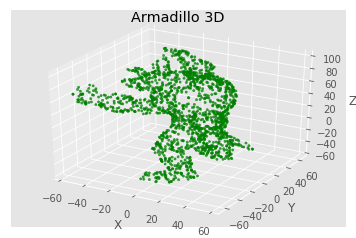

In [55]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)
plt.show()

# Get 3 images

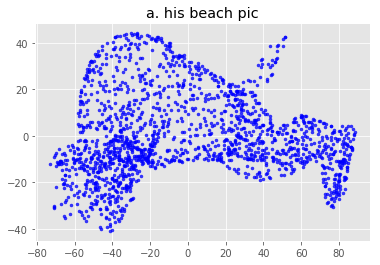

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('a. his beach pic')
ax.scatter(pca[:,0], pca[:,2], c='blue', marker='.', alpha=0.75)
plt.show()

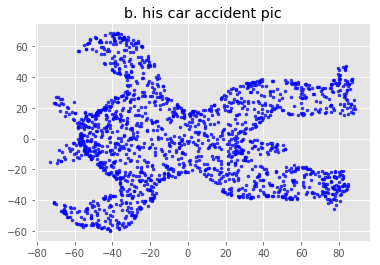

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('b. his car accident pic')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

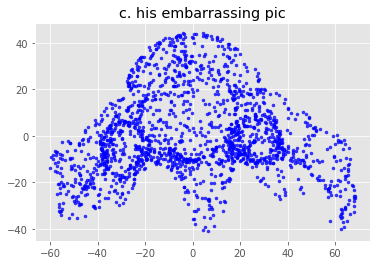

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('c. his embarrassing pic')
ax.scatter(pca[:,1], pca[:,2], c='blue', marker='.', alpha=0.75)
plt.show()

# get components

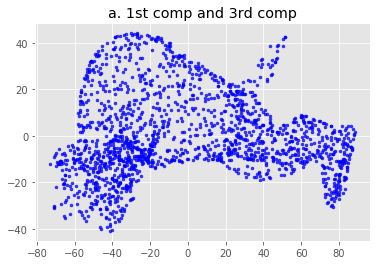

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('a. 1st comp and 3rd comp')
ax.scatter(pca[:,0], pca[:,2], c='blue', marker='.', alpha=0.75)
plt.show()

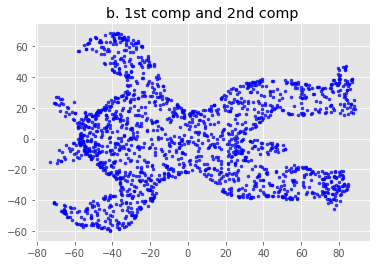

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('b. 1st comp and 2nd comp')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

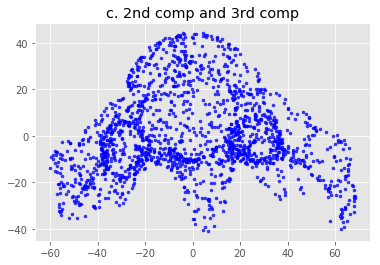

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('c. 2nd comp and 3rd comp')
ax.scatter(pca[:,1], pca[:,2], c='blue', marker='.', alpha=0.75)
plt.show()

# Principal Component Analysis (PCA)

## Set complex mathematical formula asides, what is PCA?

## We focus on application of PCA and explain its characteristics by our friend 3D Armadillo below



#### X = Depth

#### Y = Width

#### Z = Height

<table>
  <tr>
    <th></th>
    <th>![title](img/armadillo_3D.png)</th>
    <th></th>
    
  </tr>
  
</table>

# If we transform our friend 3D armadillo to a 2D image by using the first two principal components? 

# What will it look like?

<table>
  <tr>
    <th>![title](img/a_his_beach_pic.png)</th>
    <th>![title](img/b_his_car_accident_pic.png)</th>
    <th>![title](img/c_his_embarrassing_pic.png)</th>
    
  </tr>
  
</table>

# Principal Component Analysis
## One of the usages of PCA is to reduce dimensionality

## In practice, we select a number of principal components with explained variance >= 1, therefore in our case, K = 8 principal components are selected and cummulative variance explained = 62%

## http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

[0.14678079 0.09577348 0.08202411 0.06857537 0.06431612 0.0633981
 0.05471197 0.05007885 0.04435145 0.0418714  0.03721975 0.03405824
 0.03255297 0.03017873 0.02633779 0.02226101 0.02098988 0.02063281
 0.01890486 0.01521238 0.01195803 0.0097744  0.00803754]
[3.37597049 2.20279807 1.88656142 1.57723916 1.47927606 1.45816161
 1.25837978 1.15181762 1.02008694 0.96304575 0.85605743 0.78334235
 0.748721   0.69411324 0.60577127 0.5120052  0.48276901 0.47455632
 0.43481332 0.34988596 0.27503558 0.22481196 0.18486404]
Cummulative Variance Explained =  0.9999999999999998
[3.37597049 2.20279807 1.88656142 1.57723916 1.47927606 1.45816161
 1.25837978 1.15181762 1.02008694 0.96304575 0.85605743 0.78334235
 0.748721   0.69411324 0.60577127 0.5120052  0.48276901 0.47455632
 0.43481332 0.34988596 0.27503558 0.22481196 0.18486404]
suggestedDimensions 1
suggestedDimensions 2
suggestedDimensions 3
suggestedDimensions 4
suggestedDimensions 5
suggestedDimensions 6
suggestedDimensions 7
suggestedDimensions 

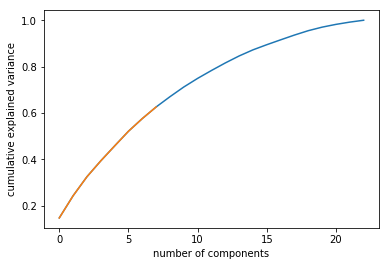

In [39]:
dtw_experiment.ReducingDimensionByPCA()

# The Dimension has been reduced to 8 features as shown below

In [40]:
dtw_experiment.get_masterset().get_data().head()

,0,1,2,3,4,5,6,7,Subject,Label
0,1.4205,0.1465,0.5270,-0.3867,-0.1648,-0.6579,-0.0743,0.8717,1,1
1,1.4678,0.1331,0.5328,-0.3466,-0.1300,-0.6373,-0.0276,0.9106,1,1
2,1.4338,0.1364,0.5147,-0.3956,-0.0741,-0.6211,-0.0309,0.9375,1,1
3,1.4356,0.1507,0.5064,-0.5469,0.0497,-0.6011,-0.0558,0.8675,1,1
4,1.4311,0.1512,0.5138,-0.4486,-0.0298,-0.6185,-0.0355,0.8930,1,1


In [41]:
dtw_experiment.get_testset().get_data().head()

,0,1,2,3,4,5,6,7,Subject,Label
0,0.8550,0.0165,1.5134,1.1538,0.6324,-0.5713,0.8255,0.4276,9,1
1,0.8899,0.0328,1.4286,0.6668,1.0188,-0.4947,0.7586,0.3125,9,1
2,0.8507,0.0589,1.4212,0.4514,1.1790,-0.4323,0.7543,0.2677,9,1
3,0.9129,0.0416,1.4055,0.3887,1.2249,-0.4393,0.7196,0.2152,9,1
4,0.8917,0.0446,1.3816,0.3088,1.2734,-0.4310,0.7018,0.2128,9,1


# I'll leave this part to you guys to illustrate further.  Just words of advice, making the explanations as simple as possible may be preferable to our audiences

# DTWExperiment methods illustration

# Assume test subject 9 who wears a wearable device and make an action 3 (lying down) (we assume the actual action is unknown), we then compare it with all 12 actions of subject 1 in master set by their distance.  As a result, we find that action 3 of subject 1 has the shortest distance with this unknown action

### given:
### Method = classifyOneMovement
### Test subject = 9
### Test subject action = 3
### subsample = 5 (for both masterset and testset)

In [53]:
one_move_df = dtw_experiment.classifyOneMovement(mastersubject_index = 1
                                                  , testsubject_index = 9
                                                  , testsubject_action_index = 3
                                                  , subsample = 5)

In [54]:
one_move_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,3,1,"4,230.4323",0.0000,0.0000
1,1,9,3,2,"3,599.0709",0.0000,0.0000
2,1,9,3,3,822.7202,1.0000,1.0000
3,1,9,3,4,"3,839.8735",0.0000,0.0000
4,1,9,3,6,"4,099.6395",0.0000,0.0000
5,1,9,3,7,"3,501.2941",0.0000,0.0000
6,1,9,3,8,"4,800.6315",0.0000,0.0000
7,1,9,3,9,"3,705.2886",0.0000,0.0000
8,1,9,3,10,"4,378.1507",0.0000,0.0000
9,1,9,3,11,"5,772.5829",0.0000,0.0000


# Instead of just comparing the unknown action with one subject in master set, we compare all 8 subjects in master set to find everyone of their actions' distance

### given:
### Method = classifyOneMovementByAllMasterSubjects
### Test subject = 9
### Test subject action = 3
### subsample = 5 (for both masterset and testset)

In [55]:
one_move_all_df = dtw_experiment.classifyOneMovementByAllMasterSubjects(testsubject_index = 9
                                                                          , testsubject_action_index = 3
                                                                          , subsample = 5)

In [56]:
one_move_all_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,3,1,"4,230.4323",0.0000,0.0000
1,1,9,3,2,"3,599.0709",0.0000,0.0000
2,1,9,3,3,822.7202,1.0000,1.0000
3,1,9,3,4,"3,839.8735",0.0000,0.0000
4,1,9,3,6,"4,099.6395",0.0000,0.0000
5,1,9,3,7,"3,501.2941",0.0000,0.0000
6,1,9,3,8,"4,800.6315",0.0000,0.0000
7,1,9,3,9,"3,705.2886",0.0000,0.0000
8,1,9,3,10,"4,378.1507",0.0000,0.0000
9,1,9,3,11,"5,772.5829",0.0000,0.0000


# We make a prediction of unknown action by using the mean distance of selective actions (12 actions in our case) in master subjects (8 subjects)

In [57]:
one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean()

,Distance
MasterSetAction,
1,"3,874.6158"
2,"3,591.5656"
3,"1,203.3770"
4,"4,073.9925"
5,"4,032.2848"
6,"4,480.4686"
7,"3,508.9006"
8,"4,515.8812"
9,"3,937.4201"


In [58]:
tempDF = one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean()

In [59]:
tempDF

,Distance
MasterSetAction,
1,"3,874.6158"
2,"3,591.5656"
3,"1,203.3770"
4,"4,073.9925"
5,"4,032.2848"
6,"4,480.4686"
7,"3,508.9006"
8,"4,515.8812"
9,"3,937.4201"


# As you can see, the mean distance of action 3 has the shortest mean distance, thus we predict that the unknown action is action 3 (lying down)

In [60]:
one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean().idxmin().values[0]

3

# We directly get the prediction by method called "predictOneMovement"

In [61]:
predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index = 9
                                                  , testsubject_action_index = 3
                                                  , subsample = 5)

In [62]:
predictedAction

3

In [63]:
predictedResult

True

# we repeat the same procedure by iterating all 2 test subjects (9 and 10) with their all actions (1 to 12) to validate how accurate DTW is for classification.  It turns out the accuracy is 0.5



In [64]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(start_test_subject_index = 9
#                                                    , end_test_subject_index = 10
#                                                    , start_test_subject_action_index = 1
#                                                    , end_test_subject_action_index = 12
#                                                    , no_of_rows = 1000)

In [69]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
#                                                    , test_subject_action_index_list = [1, 2, 3, 9, 10, 11]
#                                                    , no_of_rows = 100)

predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
                                                   , test_subject_action_index_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                                                   , subsample = 5)


In [70]:
accuracy

0.625

In [71]:
predicted_all_df

,TestSubject,ActualAction,PredictedAction,Result
0,9,1,1,True
1,9,2,7,False
2,9,3,3,True
3,9,4,4,True
4,9,5,5,True
5,9,6,8,False
6,9,7,9,False
7,9,8,9,False
8,9,9,9,True
9,9,10,10,True


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

            Standing       1.00      1.00      1.00         2
             Sitting       1.00      0.50      0.67         2
               Lying       1.00      1.00      1.00         2
             Walking       1.00      1.00      1.00         2
            Climbing       1.00      1.00      1.00         2
   WaistBendsForward       0.00      0.00      0.00         2
FrontalEvelationArms       0.00      0.00      0.00         2
           Crouching       0.00      0.00      0.00         2
             Cycling       0.33      1.00      0.50         2
             Jogging       0.50      1.00      0.67         2
             Running       0.00      0.00      0.00         2
             Jumping       1.00      1.00      1.00         2

         avg / total       0.57      0.62      0.57        24



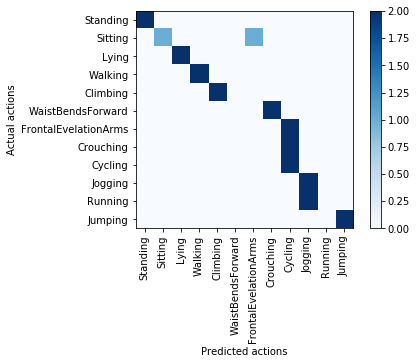

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'])
print(metrics.classification_report(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'], target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.xlabel('Predicted actions')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.ylabel('Actual actions')
plt.colorbar()

plt.show()

# From the result above, we understand that
### - DTW can be used for classification problems
### - DTW does a pretty good job at identifying actions including standing, sitting, lying down and cycling.  
### - In reality, the accuracy can probably be improved by increasing number of subjects in master set and the number of observations used

# we repeat the same procedure by iterating all 2 test subjects (9 and 10) with their all actions (1 to 12) to validate how accurate DTW is for classification.  It turns out the accuracy is 0.5



In [54]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(start_test_subject_index = 9
#                                                    , end_test_subject_index = 10
#                                                    , start_test_subject_action_index = 1
#                                                    , end_test_subject_action_index = 12
#                                                    , no_of_rows = 1000)

In [55]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
#                                                    , test_subject_action_index_list = [1, 2, 3, 9, 10, 11]
#                                                    , no_of_rows = 100)

predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
                                                   , test_subject_action_index_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                                                   , subsample = 1)


In [56]:
accuracy

0.6666666666666666

In [57]:
predicted_all_df

,TestSubject,ActualAction,PredictedAction,Result
0,9,1,1,True
1,9,2,7,False
2,9,3,3,True
3,9,4,4,True
4,9,5,5,True
5,9,6,8,False
6,9,7,9,False
7,9,8,9,False
8,9,9,9,True
9,9,10,10,True


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

            Standing       1.00      1.00      1.00         2
             Sitting       1.00      0.50      0.67         2
               Lying       1.00      1.00      1.00         2
             Walking       1.00      1.00      1.00         2
            Climbing       1.00      1.00      1.00         2
   WaistBendsForward       0.00      0.00      0.00         2
FrontalEvelationArms       0.00      0.00      0.00         2
           Crouching       0.33      0.50      0.40         2
             Cycling       0.40      1.00      0.57         2
             Jogging       0.50      1.00      0.67         2
             Running       0.00      0.00      0.00         2
             Jumping       1.00      1.00      1.00         2

         avg / total       0.60      0.67      0.61        24



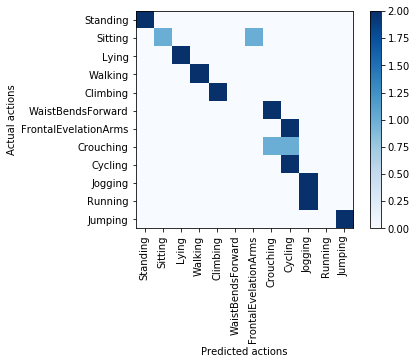

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'])
print(metrics.classification_report(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'], target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.xlabel('Predicted actions')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.ylabel('Actual actions')
plt.colorbar()

plt.show()

# From the result above, we understand that
### - DTW can be used for classification problems
### - DTW does a pretty good job at identifying actions including standing, sitting, lying down and cycling.  
### - In reality, the accuracy can probably be improved by increasing number of subjects in master set and the number of observations used

# 1. Dynamic Time Wrapping without Feature Extraction

# Pass in master and test set to initialize DTW experiment object

In [33]:
dtw_experiment = DTWExperiment(master, test)

# DTWExperiment methods illustration

# Assume test subject 9 who wears a wearable device and make an action 3 (lying down) (we assume the actual action is unknown), we then compare it with all 12 actions of subject 1 in master set by their distance.  As a result, we find that action 3 of subject 1 has the shortest distance with this unknown action

### given:
### Method = classifyOneMovement
### Test subject = 9
### Test subject action = 3
### subsample = 5 (for both masterset and testset)

In [46]:
one_move_df = dtw_experiment.classifyOneMovement(mastersubject_index = 1
                                                  , testsubject_index = 9
                                                  , testsubject_action_index = 3
                                                  , subsample = 5)

In [47]:
one_move_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,3,1,15896.525478,0.0,0.0
1,1,9,3,2,14872.978827,0.0,0.0
2,1,9,3,3,5267.540563,1.0,1.0
3,1,9,3,4,72020.459042,0.0,0.0
4,1,9,3,6,29399.703324,0.0,0.0
5,1,9,3,7,50186.215627,0.0,0.0
6,1,9,3,8,36563.425047,0.0,0.0
7,1,9,3,9,28262.583056,0.0,0.0
8,1,9,3,10,131347.195772,0.0,0.0
9,1,9,3,11,183413.823964,0.0,0.0


# Instead of just comparing the unknown action with one subject in master set, we compare all 8 subjects in master set to find everyone of their actions' distance

### given:
### Method = classifyOneMovementByAllMasterSubjects
### Test subject = 9
### Test subject action = 3
### subsample = 5 (for both masterset and testset)

In [48]:
one_move_all_df = dtw_experiment.classifyOneMovementByAllMasterSubjects(testsubject_index = 9
                                                                          , testsubject_action_index = 3
                                                                          , subsample = 5)

In [49]:
one_move_all_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,3,1,15896.525478,0.0,0.0
1,1,9,3,2,14872.978827,0.0,0.0
2,1,9,3,3,5267.540563,1.0,1.0
3,1,9,3,4,72020.459042,0.0,0.0
4,1,9,3,6,29399.703324,0.0,0.0
5,1,9,3,7,50186.215627,0.0,0.0
6,1,9,3,8,36563.425047,0.0,0.0
7,1,9,3,9,28262.583056,0.0,0.0
8,1,9,3,10,131347.195772,0.0,0.0
9,1,9,3,11,183413.823964,0.0,0.0


# We make a prediction of unknown action by using the mean distance of selective actions (12 actions in our case) in master subjects (8 subjects)

In [50]:
one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean()

,Distance
MasterSetAction,
1,16113.610868
2,14844.591196
3,5363.972850
4,74388.472017
5,46159.090443
6,26748.873868
7,45221.837417
8,30548.796371
9,27580.627554


In [51]:
tempDF = one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean()

In [52]:
tempDF

,Distance
MasterSetAction,
1,16113.610868
2,14844.591196
3,5363.972850
4,74388.472017
5,46159.090443
6,26748.873868
7,45221.837417
8,30548.796371
9,27580.627554


# As you can see, the mean distance of action 3 has the shortest mean distance, thus we predict that the unknown action is action 3 (lying down)

In [53]:
one_move_all_df[['MasterSetAction','Distance']].groupby(by="MasterSetAction").mean().idxmin().values[0]

3

# We directly get the prediction by method call "predictOneMovement"

In [54]:
predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index = 9
                                                  , testsubject_action_index = 3
                                                  , subsample = 5)

In [55]:
predictedAction

3

In [56]:
predictedResult

True

# we repeat the same procedure by iterating all 2 test subjects (9 and 10) with their all actions (1 to 12) to validate how accurate DTW is for classification.  It turns out the accuracy is 0.5



In [57]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(start_test_subject_index = 9
#                                                    , end_test_subject_index = 10
#                                                    , start_test_subject_action_index = 1
#                                                    , end_test_subject_action_index = 12
#                                                    , no_of_rows = 1000)

In [100]:
# predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
#                                                    , test_subject_action_index_list = [1, 2, 3, 9, 10, 11]
#                                                    , no_of_rows = 100)

predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(test_subject_index_list = [9, 10]
                                                   , test_subject_action_index_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                                                   , subsample = 1)


In [101]:
accuracy

0.5

In [102]:
predicted_all_df

,TestSubject,ActualAction,PredictedAction,Result
0,9,1,1,True
1,9,2,2,True
2,9,3,3,True
3,9,4,4,True
4,9,5,1,False
5,9,6,1,False
6,9,7,7,True
7,9,8,1,False
8,9,9,1,False
9,9,10,10,True


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

            Standing       0.20      1.00      0.33         2
             Sitting       1.00      1.00      1.00         2
               Lying       0.67      1.00      0.80         2
             Walking       1.00      0.50      0.67         2
            Climbing       0.00      0.00      0.00         2
   WaistBendsForward       0.00      0.00      0.00         2
FrontalEvelationArms       1.00      0.50      0.67         2
           Crouching       0.00      0.00      0.00         2
             Cycling       0.50      0.50      0.50         2
             Jogging       0.50      1.00      0.67         2
             Running       0.00      0.00      0.00         2
             Jumping       1.00      0.50      0.67         2

         avg / total       0.49      0.50      0.44        24



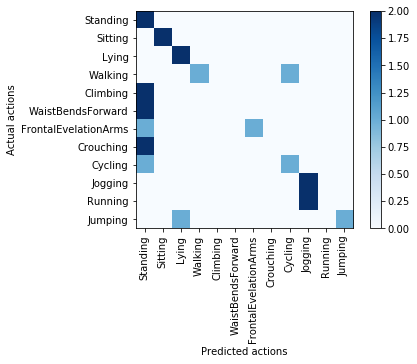

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'])
print(metrics.classification_report(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'], target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.xlabel('Predicted actions')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.ylabel('Actual actions')
plt.colorbar()

plt.show()

# From the result above, we understand that
### - DTW can be used for classification problems
### - DTW does a pretty good job at identifying actions including standing, sitting, lying down and cycling.  
### - In reality, the accuracy can probably be improved by increasing number of subjects in master set and the number of observations used

# Please use the results up to here.  

# Then we continue to the steps to use Dynamic Time Wrapping for classification and see how much the feature extraction techniques affect the accuracy

# DTWExperiment methods illustration

# Assume test subject 9 who wears a wearable device and make an action 4 (walking) (we assume the actual action is unknown), we then compare it with all 12 actions of subject 1 in master set by their distance.  As a result, we find that action 4 of subject 1 has the shortest distance with this unknown action

### given:
### Method = classifyOneMovement
### Test subject = 9
### Test subject action = 4
### No of observations = 1000 (for both masterset and testset)

In [86]:
one_move_df = dtw_experiment.classifyOneMovement(mastersubject_index = 1
                                                  , testsubject_index = 9
                                                  , testsubject_action_index = 4
                                                  , no_of_rows = 1000)

In [87]:
one_move_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,4,1,3342.490195,0.0,0.0
1,1,9,4,2,2362.001193,0.0,0.0
2,1,9,4,3,6051.620857,0.0,0.0
3,1,9,4,4,1526.577028,1.0,1.0
4,1,9,4,5,3049.323554,0.0,0.0
5,1,9,4,6,3197.788922,0.0,0.0
6,1,9,4,7,3392.985337,0.0,0.0
7,1,9,4,8,3038.188182,0.0,0.0
8,1,9,4,9,2941.908263,0.0,0.0
9,1,9,4,10,4602.566874,0.0,0.0


# Instead of just comparing the unknown action with one subject in master set, we compare all 8 subjects in master set to find everyone of their actions with isMinDistance = 1

### given:
### Method = classifyOneMovementByAllMasterSubjects
### Test subject = 9
### Test subject action = 4
### No of observations = 1000 (for both masterset and testset)

In [88]:
one_move_all_df = dtw_experiment.classifyOneMovementByAllMasterSubjects(testsubject_index = 9
                                                                          , testsubject_action_index = 4
                                                                          , no_of_rows = 1000)

In [89]:
one_move_all_df

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
0,1,9,4,1,3342.490195,0.0,0.0
1,1,9,4,2,2362.001193,0.0,0.0
2,1,9,4,3,6051.620857,0.0,0.0
3,1,9,4,4,1526.577028,1.0,1.0
4,1,9,4,5,3049.323554,0.0,0.0
5,1,9,4,6,3197.788922,0.0,0.0
6,1,9,4,7,3392.985337,0.0,0.0
7,1,9,4,8,3038.188182,0.0,0.0
8,1,9,4,9,2941.908263,0.0,0.0
9,1,9,4,10,4602.566874,0.0,0.0


# As you can see, of all 8 subjects in master set, 5 of them have a shortest distance with action 4 (walking) which is the same as actual action

In [90]:
one_move_all_df[one_move_all_df['isMinDistance'] == 1]

,MasterSubject,TestSubject,TestSubjectAction,MasterSetAction,Distance,isMinDistance,isCorrect
3,1,9,4,4,1526.577028,1.0,1.0
3,2,9,4,4,1370.087239,1.0,1.0
3,3,9,4,4,1781.166299,1.0,1.0
3,4,9,4,4,1527.733078,1.0,1.0
0,5,9,4,1,2480.311625,1.0,0.0
8,6,9,4,9,3280.818704,1.0,0.0
3,7,9,4,4,1567.455906,1.0,1.0
4,8,9,4,5,1730.692622,1.0,0.0


# Hence, we predict the unknown action is action 4 (walking)

In [91]:
c = Counter(one_move_all_df[one_move_all_df['isMinDistance'] == 1]['MasterSetAction'])
freq = c.most_common(8)
freq[0][0]

4

# We directly get the prediction by method call "predictOneMovement"

In [92]:
predictedAction, predictedResult = dtw_experiment.predictOneMovement(testsubject_index = 9
                                                  , testsubject_action_index = 4
                                                  , no_of_rows = 1000)

In [93]:
predictedAction

4

In [94]:
predictedResult

True

# we repeat the same procedure by iterating all 2 test subjects (9 and 10) with their all actions (1 to 12) to validate how accurate DTW is for classification.  It turns out the accuracy is 0.54



In [97]:
predicted_all_df, accuracy = dtw_experiment.PredictAllMovements(start_test_subject_index = 9
                                                   , end_test_subject_index = 10
                                                   , start_test_subject_action_index = 1
                                                   , end_test_subject_action_index = 12
                                                   , no_of_rows = 1000)

In [98]:
accuracy

0.6666666666666666

In [99]:
predicted_all_df

,TestSubject,ActualAction,PredictedAction,Result
0,9,1,1,True
1,9,2,2,True
2,9,3,3,True
3,9,4,4,True
4,9,5,5,True
5,9,6,8,False
6,9,7,1,False
7,9,8,2,False
8,9,9,9,True
9,9,10,10,True


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

            Standing       0.50      1.00      0.67         2
             Sitting       0.40      1.00      0.57         2
               Lying       1.00      1.00      1.00         2
             Walking       1.00      1.00      1.00         2
            Climbing       1.00      1.00      1.00         2
   WaistBendsForward       0.00      0.00      0.00         2
FrontalEvelationArms       0.00      0.00      0.00         2
           Crouching       0.00      0.00      0.00         2
             Cycling       1.00      1.00      1.00         2
             Jogging       0.67      1.00      0.80         2
             Running       1.00      0.50      0.67         2
             Jumping       1.00      0.50      0.67         2

         avg / total       0.63      0.67      0.61        24



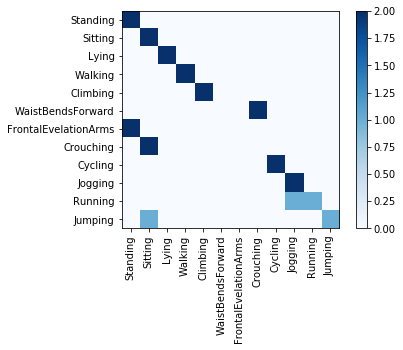

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'])
print(metrics.classification_report(predicted_all_df['ActualAction'], predicted_all_df['PredictedAction'], target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.colorbar()

plt.show()

# From the result above, we understand that
### - It turns out feature extraction does not harm overall accuracy
### - Running speed has been improved by reducing features' dimension to 8 features
### - DTW can be used for classification problems
### - Without feature extraction, DTW used to be good at identifying actions including lying down, cycling, jogging and running.  After feature extraction, DTW is still good at identifying actions including lying down and cycling.  Walking is a new action with good prediction by DTW.  
### - Without feature extraction, DTW had difficulty in identifying waisting bends forward, crouching and jumping.  
### - After feature extraction, DTW is still bad at identifying waisting bends forward, crouching.  FrontalEvelationArm is something new to be bad at prediction for DTW.  
### - In reality, the accuracy can probably be improved by increasing number of subjects in master set and the number of observations used

# In case we need to add more things to our presentation and to compare and contrast with KNN, I've also prepared the classification results by KNN

## 3. KNN without feature extraction
## 4. KNN with feature extraction (scaling = normalization + dimension reduction = PCA)
## 5. KNN with feature extraction (scaling = normalization + feature selection = by an ensembled tree model)

In [101]:
train = trainset()
train.get_data().describe()

1
2
3
4
5
6
7
8


,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label,Subject
count,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,...,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000
mean,-8.518752,-0.174633,-0.905132,-0.006169,-0.006112,1.485395,-9.615101,-0.978856,-0.025721,-0.615006,...,-5.712971,2.664758,-0.290268,-0.450772,0.281064,0.221577,0.713939,-0.231837,1.728081,4.283813
std,4.039471,2.031514,3.643498,0.787437,0.776563,3.782546,4.112128,5.371134,0.495167,0.356866,...,5.724964,3.913573,0.529716,0.565249,0.559767,26.535969,32.930673,67.541034,3.273471,2.373621
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,...,-18.972000,-18.239000,-8.339200,-3.570800,-2.689700,-319.030000,-363.900000,-717.550000,0.000000,1.000000
25%,-9.802400,-1.178300,-2.820400,-0.251180,-0.205130,0.090603,-10.144000,-2.725700,-0.450830,-0.818010,...,-9.379400,0.395030,-0.707840,-0.885010,-0.219830,-6.204900,-9.446200,-13.865000,0.000000,2.000000
50%,-9.296700,-0.286690,-0.723700,-0.075353,-0.046049,1.365500,-9.638100,-0.066457,-0.076067,-0.701690,...,-7.329800,2.260200,-0.368630,-0.620120,0.321120,0.362590,0.350410,-0.560180,0.000000,4.000000
75%,-7.730300,0.736010,0.987390,0.159080,0.154890,2.612100,-9.011300,1.385600,0.423010,-0.536590,...,-2.414600,5.241400,0.052941,-0.080082,0.784480,6.823300,10.029000,12.867000,2.000000,6.000000
max,19.094000,20.917000,26.196000,8.514900,8.519100,20.054000,21.161000,25.015000,60.484000,2.011300,...,22.191000,25.741000,3.319600,1.556500,2.750000,251.150000,337.760000,657.180000,12.000000,8.000000


In [102]:
test = testset()
test.get_data().describe()

9
10


,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label,Subject
count,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,...,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000
mean,-8.537544,-0.379634,-1.690475,-0.000717,0.002250,1.531243,-10.020109,-0.853622,0.099886,-0.623470,...,-6.194928,1.254234,-0.216523,-0.532330,0.205922,-0.045885,0.716668,-0.934685,1.797774,9.421053
std,4.222653,2.535028,3.189185,0.542034,0.463945,4.005870,4.396545,5.826762,0.460603,0.345039,...,5.877196,3.493546,0.514824,0.507475,0.579468,27.257121,35.525206,77.434169,3.325701,0.493729
min,-22.306000,-20.032000,-18.400000,-5.057000,-6.078500,-22.126000,-19.599000,-19.364000,-1.651200,-3.170700,...,-18.932000,-18.228000,-2.468600,-2.256700,-1.829700,-230.440000,-361.060000,-668.430000,0.000000,9.000000
25%,-9.811000,-1.720600,-3.011350,-0.188380,-0.142330,0.301960,-10.519000,-2.176150,-0.348790,-0.821760,...,-9.495825,-0.590983,-0.696080,-0.958930,-0.340520,-6.143550,-9.875975,-16.103500,0.000000,9.000000
50%,-9.370500,-0.664240,-1.456300,-0.066981,-0.037677,1.069100,-9.799300,0.133470,0.239330,-0.722330,...,-8.146450,0.916790,-0.276470,-0.673510,0.234910,0.364400,0.355870,-0.713110,0.000000,9.000000
75%,-7.137100,0.518607,-0.169995,0.159080,0.125590,2.315500,-9.193475,1.067400,0.506490,-0.544090,...,-2.731175,2.772500,0.286270,-0.232030,0.737070,6.652050,10.259000,14.780250,2.000000,10.000000
max,19.078000,20.927000,14.312000,5.484000,5.869200,20.024000,20.957000,24.400000,1.578800,1.985000,...,21.901000,24.475000,1.415700,1.100600,1.446100,239.710000,336.120000,616.930000,12.000000,10.000000


In [103]:
train.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


In [104]:
test.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


In [105]:
X_train, y_train = train.get_XY()

In [106]:
X_train.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerArmZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
6656,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-0.73822,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6657,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-0.88628,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363
6658,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-1.01980,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6659,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-1.17150,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198
6660,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-0.88628,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017


In [107]:
y_train.head()

6656    1
6657    1
6658    1
6659    1
6660    1
Name: Label, dtype: int64

In [108]:
X_test, y_test = test.get_XY()

In [109]:
X_test.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerArmZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
12288,-9.4805,-1.7301,-0.10308,-0.753530,-0.502350,0.79065,-9.7829,0.91459,-0.57699,-0.77298,...,-0.44769,-2.7267,-9.0376,1.2356,-0.80784,-0.70226,-0.15302,0.008892,0.88921,-1.8138
12289,-9.4886,-1.8315,-0.08062,-0.288850,-0.125590,0.80350,-9.9303,1.03240,-0.57699,-0.77298,...,-0.58122,-2.7424,-9.3879,1.2077,-0.80784,-0.70226,-0.15302,-0.174250,0.52807,-1.8138
12290,-9.9525,-1.8703,0.30536,-0.041863,-0.004186,0.71974,-9.7724,0.97691,-0.57699,-0.77298,...,-0.29787,-2.7871,-8.9777,1.2282,-0.80784,-0.68994,-0.15948,0.366180,0.71146,-1.0828
12291,-9.5801,-1.8014,-0.15160,0.025118,0.037677,0.75194,-9.9608,0.94698,-0.57699,-0.77298,...,-0.58481,-2.9003,-9.2391,1.0901,-0.80784,-0.68994,-0.15948,0.188370,0.88385,-2.1711
12292,-9.2542,-1.9377,-0.33229,0.092098,0.092098,0.73087,-9.8915,0.95023,-0.55659,-0.76360,...,-0.44410,-2.9607,-9.2091,1.0916,-0.80784,-0.68994,-0.15948,0.369740,1.06710,-1.8083


In [110]:
y_test.head()

12288    1
12289    1
12290    1
12291    1
12292    1
Name: Label, dtype: int64

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(275151, 23)
(275151,)
(68044, 23)
(68044,)


# 3. KNN without feature extraction

# KNN
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

# Exhaustive grid search and cross validation applied
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [113]:
from sklearn import grid_search
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# parameters = {'n_neighbors':[1, 3, 5, 7, 9, 11, 13]
#               , 'weights':('uniform', 'distance')
#               , 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}   

parameters = {'n_neighbors':[5, 10, 15]} 
model = KNeighborsClassifier()    

clf = grid_search.GridSearchCV(estimator = model, param_grid = parameters, cv = 3, verbose=True)   
clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=True)

In [115]:
print('best score = ', clf.best_score_)
print('best parameters = ', clf.best_params_)


best score =  0.7690540830307722
best parameters =  {'n_neighbors': 5}


In [116]:
clf.score(X_train, y_train) 

0.9421517639405272

In [117]:
y_test_predicted = clf.predict(X_test)

In [118]:
print(y_test.shape)
print(y_test_predicted.shape)

(68044,)
(68044,)


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_test, y_test_predicted))
print(accuracy_score(y_test, y_test_predicted))

[[6092    0    0    0    2   14    2   34    0    0    0    0]
 [   0 6140    0    0    0    4    0    0    0    0    0    0]
 [   0    0 6144    0    0    0    0    0    0    0    0    0]
 [   0    0    0 4206 1186   35    1  535  178    1    0    2]
 [   6    0    0  528 4230  278   49  904  129    6    3   11]
 [  97   13    0   39  215 4344   64  547    6    0    0    0]
 [ 170    0    0    0   14  175 5051  220    2    0    0    0]
 [  60    6    0   54  230  721    6 4577  182    0    0    0]
 [   0    4    0    9   62   37    4  241 5787    0    0    0]
 [   0    0    0  240  245  112   46  101   33 4751  397  219]
 [   0    0    0   50   59    5    5    8    2 1356 4561   98]
 [   0    0    1  352  411   20   54  139   77  299  180  566]]
0.8295955558168244


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

                      precision    recall  f1-score   support

            Standing       0.95      0.99      0.97      6144
             Sitting       1.00      1.00      1.00      6144
               Lying       1.00      1.00      1.00      6144
             Walking       0.77      0.68      0.72      6144
            Climbing       0.64      0.69      0.66      6144
   WaistBendsForward       0.76      0.82      0.78      5325
FrontalEvelationArms       0.96      0.90      0.93      5632
           Crouching       0.63      0.78      0.70      5836
             Cycling       0.90      0.94      0.92      6144
             Jogging       0.74      0.77      0.76      6144
             Running       0.89      0.74      0.81      6144
             Jumping       0.63      0.27      0.38      2099

         avg / total       0.83      0.83      0.83     68044



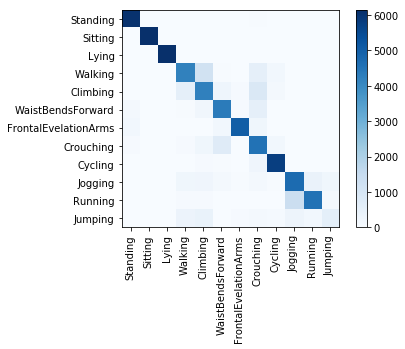

In [120]:
import matplotlib.pyplot as plt

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(y_test, y_test_predicted)
print(metrics.classification_report(y_test, y_test_predicted, target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.colorbar()

plt.show()

# 4. KNN with feature extraction (normalization + dimension reduction)

# Scaling by normalization (z = (x - mean) / sd)

In [121]:
from sklearn import preprocessing

In [122]:
preprocessor = preprocessing.StandardScaler()
preprocessor.fit(X_train)
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [123]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.392210,0.265207,0.409158,0.008721,-0.024941,0.201368,-0.075378,0.169869,-0.616548,-0.779361,...,-0.022801,0.077568,-0.487739,-0.148147,0.277797,-0.962791,-1.393183,0.025045,-0.060902,-0.008594
1,-0.391255,0.159957,0.308383,-0.028394,-0.015954,0.145172,-0.090605,0.173739,-0.616548,-0.779361,...,-0.030350,0.052372,-0.509361,-0.217823,0.277797,-0.962791,-1.393183,0.035628,-0.043696,-0.000065
2,-0.406473,0.098196,0.323380,0.027278,0.028983,0.138148,-0.103824,0.186081,-0.596675,-0.732157,...,-0.037157,0.070713,-0.507804,-0.210408,0.277797,-0.962791,-1.393183,0.025045,-0.060902,-0.008594
3,-0.385626,0.121248,0.342729,0.198933,0.150309,0.135573,-0.103940,0.177986,-0.596675,-0.732157,...,-0.044891,0.063993,-0.504795,-0.212600,0.241463,-0.962791,-1.384894,0.025097,-0.055206,-0.008615
4,-0.392784,0.136330,0.345773,0.101507,0.060439,0.123088,-0.092535,0.173520,-0.596675,-0.732157,...,-0.030350,0.068743,-0.509225,-0.195950,0.241463,-0.962791,-1.384894,0.014672,-0.055209,-0.012954


# Dimension Reduction by PCA

In [124]:
from sklearn.decomposition import PCA
import numpy as np

In [125]:
def doPCA(data, dimensions=2):

    model = PCA(n_components=dimensions)
    model.fit(data)
    print(model.explained_variance_ratio_)
    print(model.explained_variance_)
    print ("Cummulative Variance Explained = ", (np.sum(model.explained_variance_ratio_)))

    print(model.explained_variance_)
    
    suggestedDimensions = 0
    for suggestedDimensions in range(0, len(model.explained_variance_)):
        if model.explained_variance_[suggestedDimensions] >= 1:
            suggestedDimensions = suggestedDimensions + 1
            print('suggestedDimensions',suggestedDimensions)
        else:
            suggestedDimensions = suggestedDimensions - 1
            print('suggestedDimensions',suggestedDimensions)
            break

    # print "Suggested Dimensions = %d" % suggestedDimensions

    return suggestedDimensions, model

In [126]:
X_train_scaled.shape

(275151, 23)

In [127]:
X_test_scaled.shape

(68044, 23)

In [128]:
suggestedDimensions, pca = doPCA(data = X_train_scaled, dimensions = X_train_scaled.shape[1])

[0.14678079 0.09577348 0.08202411 0.06857537 0.06431612 0.0633981
 0.05471197 0.05007885 0.04435145 0.0418714  0.03721975 0.03405824
 0.03255297 0.03017873 0.02633779 0.02226101 0.02098988 0.02063281
 0.01890486 0.01521238 0.01195803 0.0097744  0.00803754]
[3.37597049 2.20279807 1.88656142 1.57723916 1.47927606 1.45816161
 1.25837978 1.15181762 1.02008694 0.96304575 0.85605743 0.78334235
 0.748721   0.69411324 0.60577127 0.5120052  0.48276901 0.47455632
 0.43481332 0.34988596 0.27503558 0.22481196 0.18486404]
Cummulative Variance Explained =  0.9999999999999998
[3.37597049 2.20279807 1.88656142 1.57723916 1.47927606 1.45816161
 1.25837978 1.15181762 1.02008694 0.96304575 0.85605743 0.78334235
 0.748721   0.69411324 0.60577127 0.5120052  0.48276901 0.47455632
 0.43481332 0.34988596 0.27503558 0.22481196 0.18486404]
suggestedDimensions 1
suggestedDimensions 2
suggestedDimensions 3
suggestedDimensions 4
suggestedDimensions 5
suggestedDimensions 6
suggestedDimensions 7
suggestedDimensions 

In [129]:
suggestedDimensions, pca = doPCA(data = X_train_scaled, dimensions = suggestedDimensions)

[0.14678079 0.09577303 0.0820241  0.06857441 0.06431524 0.06339772
 0.05471011 0.05006594]
[3.37597047 2.2027877  1.88656106 1.57721707 1.47925594 1.45815284
 1.25833701 1.15152072]
Cummulative Variance Explained =  0.6256413268220969
[3.37597047 2.2027877  1.88656106 1.57721707 1.47925594 1.45815284
 1.25833701 1.15152072]
suggestedDimensions 1
suggestedDimensions 2
suggestedDimensions 3
suggestedDimensions 4
suggestedDimensions 5
suggestedDimensions 6
suggestedDimensions 7
suggestedDimensions 8


In [130]:
X_train_trans = pca.transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)

In [131]:
X_train_trans.shape

(275151, 8)

In [132]:
X_test_trans.shape

(68044, 8)

# Train and validate KNN

In [133]:
from sklearn import grid_search
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# parameters = {'n_neighbors':[1, 3, 5, 7, 9, 11, 13]
#               , 'weights':('uniform', 'distance')
#               , 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}   

parameters = {'n_neighbors':[5, 10, 15]} 
model = KNeighborsClassifier()    

clf = grid_search.GridSearchCV(estimator = model, param_grid = parameters, cv = 3, verbose=True)   
clf.fit(X_train_trans, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=True)

In [135]:
# sorted(clf.cv_results_.keys())
# print(clf.cv_results_)
print('best score = ', clf.best_score_)
print('best parameters = ', clf.best_params_)


best score =  0.5932633354049232
best parameters =  {'n_neighbors': 15}


In [136]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=7)
# clf.fit(X_train_trans, y_train)

In [137]:
clf.score(X_train_trans, y_train) 

0.9632274641923889

In [138]:
y_test_trans_predicted = clf.predict(X_test_trans)

In [139]:
print(y_test.shape)
print(y_test_trans_predicted.shape)

(68044,)
(68044,)


In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_test, y_test_trans_predicted))
print(accuracy_score(y_test, y_test_trans_predicted))

[[ 234    0    0    0   36  299 1726 3849    0    0    0    0]
 [  25 3009    0   11    1    0 3072   26    0    0    0    0]
 [   0    0 6144    0    0    0    0    0    0    0    0    0]
 [   2    3    0 4966 1091   53   13   10    0    1    5    0]
 [  62   62    0  284 4451  189  193  760  119   21    0    3]
 [ 461    0    0   11 1120 1716    0  469 1548    0    0    0]
 [ 628  105    0  593 2139    1 1367  129  669    0    0    1]
 [ 109  139    0    0 1142    5    0 3124 1317    0    0    0]
 [   1    0    0    7   10    7    0    0 6119    0    0    0]
 [   0    0    0   57    6   14   20   18    0 5859   41  129]
 [   0    0    0   68    0    0    0    0    0  728 5304   44]
 [   0    2    0  126  361   33   34   21   14  502   76  930]]
0.6352213273764035


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

                      precision    recall  f1-score   support

            Standing       0.15      0.04      0.06      6144
             Sitting       0.91      0.49      0.64      6144
               Lying       1.00      1.00      1.00      6144
             Walking       0.81      0.81      0.81      6144
            Climbing       0.43      0.72      0.54      6144
   WaistBendsForward       0.74      0.32      0.45      5325
FrontalEvelationArms       0.21      0.24      0.23      5632
           Crouching       0.37      0.54      0.44      5836
             Cycling       0.63      1.00      0.77      6144
             Jogging       0.82      0.95      0.88      6144
             Running       0.98      0.86      0.92      6144
             Jumping       0.84      0.44      0.58      2099

         avg / total       0.65      0.64      0.62     68044



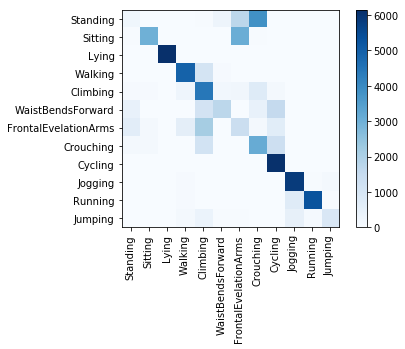

In [141]:
import matplotlib.pyplot as plt

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(y_test, y_test_trans_predicted)
print(metrics.classification_report(y_test, y_test_trans_predicted, target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.colorbar()

plt.show()

# 5. KNN with feature extraction (normalization + feature selection)

In [142]:
train = trainset()
train.get_data().describe()

1
2
3
4
5
6
7
8


,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label,Subject
count,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,...,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000,982273.000000
mean,-8.518752,-0.174633,-0.905132,-0.006169,-0.006112,1.485395,-9.615101,-0.978856,-0.025721,-0.615006,...,-5.712971,2.664758,-0.290268,-0.450772,0.281064,0.221577,0.713939,-0.231837,1.728081,4.283813
std,4.039471,2.031514,3.643498,0.787437,0.776563,3.782546,4.112128,5.371134,0.495167,0.356866,...,5.724964,3.913573,0.529716,0.565249,0.559767,26.535969,32.930673,67.541034,3.273471,2.373621
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,...,-18.972000,-18.239000,-8.339200,-3.570800,-2.689700,-319.030000,-363.900000,-717.550000,0.000000,1.000000
25%,-9.802400,-1.178300,-2.820400,-0.251180,-0.205130,0.090603,-10.144000,-2.725700,-0.450830,-0.818010,...,-9.379400,0.395030,-0.707840,-0.885010,-0.219830,-6.204900,-9.446200,-13.865000,0.000000,2.000000
50%,-9.296700,-0.286690,-0.723700,-0.075353,-0.046049,1.365500,-9.638100,-0.066457,-0.076067,-0.701690,...,-7.329800,2.260200,-0.368630,-0.620120,0.321120,0.362590,0.350410,-0.560180,0.000000,4.000000
75%,-7.730300,0.736010,0.987390,0.159080,0.154890,2.612100,-9.011300,1.385600,0.423010,-0.536590,...,-2.414600,5.241400,0.052941,-0.080082,0.784480,6.823300,10.029000,12.867000,2.000000,6.000000
max,19.094000,20.917000,26.196000,8.514900,8.519100,20.054000,21.161000,25.015000,60.484000,2.011300,...,22.191000,25.741000,3.319600,1.556500,2.750000,251.150000,337.760000,657.180000,12.000000,8.000000


In [143]:
test = testset()
test.get_data().describe()

9
10


,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label,Subject
count,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,...,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000,233472.000000
mean,-8.537544,-0.379634,-1.690475,-0.000717,0.002250,1.531243,-10.020109,-0.853622,0.099886,-0.623470,...,-6.194928,1.254234,-0.216523,-0.532330,0.205922,-0.045885,0.716668,-0.934685,1.797774,9.421053
std,4.222653,2.535028,3.189185,0.542034,0.463945,4.005870,4.396545,5.826762,0.460603,0.345039,...,5.877196,3.493546,0.514824,0.507475,0.579468,27.257121,35.525206,77.434169,3.325701,0.493729
min,-22.306000,-20.032000,-18.400000,-5.057000,-6.078500,-22.126000,-19.599000,-19.364000,-1.651200,-3.170700,...,-18.932000,-18.228000,-2.468600,-2.256700,-1.829700,-230.440000,-361.060000,-668.430000,0.000000,9.000000
25%,-9.811000,-1.720600,-3.011350,-0.188380,-0.142330,0.301960,-10.519000,-2.176150,-0.348790,-0.821760,...,-9.495825,-0.590983,-0.696080,-0.958930,-0.340520,-6.143550,-9.875975,-16.103500,0.000000,9.000000
50%,-9.370500,-0.664240,-1.456300,-0.066981,-0.037677,1.069100,-9.799300,0.133470,0.239330,-0.722330,...,-8.146450,0.916790,-0.276470,-0.673510,0.234910,0.364400,0.355870,-0.713110,0.000000,9.000000
75%,-7.137100,0.518607,-0.169995,0.159080,0.125590,2.315500,-9.193475,1.067400,0.506490,-0.544090,...,-2.731175,2.772500,0.286270,-0.232030,0.737070,6.652050,10.259000,14.780250,2.000000,10.000000
max,19.078000,20.927000,14.312000,5.484000,5.869200,20.024000,20.957000,24.400000,1.578800,1.985000,...,21.901000,24.475000,1.415700,1.100600,1.446100,239.710000,336.120000,616.930000,12.000000,10.000000


In [144]:
train.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


In [145]:
test.data_cleaning()

before cleaning [ 0  1  2  3  4  6  7  8  9 10 11 12  5]
after cleaning [ 1  2  3  4  6  7  8  9 10 11 12  5]


In [146]:
X_train, y_train = train.get_XY()

In [147]:
X_train.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerArmZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
6656,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-0.73822,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6657,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-0.88628,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363
6658,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-1.01980,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020
6659,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-1.17150,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198
6660,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-0.88628,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017


In [148]:
y_train.head()

6656    1
6657    1
6658    1
6659    1
6660    1
Name: Label, dtype: int64

In [149]:
X_test, y_test = test.get_XY()

In [150]:
X_test.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerArmZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
12288,-9.4805,-1.7301,-0.10308,-0.753530,-0.502350,0.79065,-9.7829,0.91459,-0.57699,-0.77298,...,-0.44769,-2.7267,-9.0376,1.2356,-0.80784,-0.70226,-0.15302,0.008892,0.88921,-1.8138
12289,-9.4886,-1.8315,-0.08062,-0.288850,-0.125590,0.80350,-9.9303,1.03240,-0.57699,-0.77298,...,-0.58122,-2.7424,-9.3879,1.2077,-0.80784,-0.70226,-0.15302,-0.174250,0.52807,-1.8138
12290,-9.9525,-1.8703,0.30536,-0.041863,-0.004186,0.71974,-9.7724,0.97691,-0.57699,-0.77298,...,-0.29787,-2.7871,-8.9777,1.2282,-0.80784,-0.68994,-0.15948,0.366180,0.71146,-1.0828
12291,-9.5801,-1.8014,-0.15160,0.025118,0.037677,0.75194,-9.9608,0.94698,-0.57699,-0.77298,...,-0.58481,-2.9003,-9.2391,1.0901,-0.80784,-0.68994,-0.15948,0.188370,0.88385,-2.1711
12292,-9.2542,-1.9377,-0.33229,0.092098,0.092098,0.73087,-9.8915,0.95023,-0.55659,-0.76360,...,-0.44410,-2.9607,-9.2091,1.0916,-0.80784,-0.68994,-0.15948,0.369740,1.06710,-1.8083


In [151]:
y_test.head()

12288    1
12289    1
12290    1
12291    1
12292    1
Name: Label, dtype: int64

In [152]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(275151, 23)
(275151,)
(68044, 23)
(68044,)


# Scaling by normalization (z = (x - mean) / sd)

In [153]:
from sklearn import preprocessing

In [154]:
preprocessor = preprocessing.StandardScaler()
preprocessor.fit(X_train)
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Feature Selection
http://scikit-learn.org/stable/modules/feature_selection.html

In [155]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print('before feature selection on training set', X_train_scaled.shape)
print('before feature selection on test set', X_test_scaled.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X_train_scaled, y_train)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_train_trans = model.transform(X_train_scaled)
X_test_trans = model.transform(X_test_scaled)

print('after feature selection on training set', X_train_trans.shape)
print('after feature selection on test set', X_test_trans.shape)


before feature selection on training set (275151, 23)
before feature selection on test set (68044, 23)
[0.06706981 0.02375726 0.08607862 0.00607989 0.00825448 0.02371265
 0.03883288 0.05013598 0.06824302 0.05271909 0.06360984 0.05361779
 0.01380118 0.01517245 0.04151526 0.06177117 0.03455051 0.08417799
 0.0773464  0.06496182 0.02823974 0.01074841 0.02560374]
after feature selection on training set (275151, 11)
after feature selection on test set (68044, 11)


In [156]:
X_train_trans.shape

(275151, 11)

In [157]:
X_test_trans.shape

(68044, 11)

# Train and validate KNN

In [158]:
from sklearn import grid_search
from sklearn.neighbors import KNeighborsClassifier

In [159]:
# parameters = {'n_neighbors':[1, 3, 5, 7, 9, 11, 13]
#               , 'weights':('uniform', 'distance')
#               , 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}   

parameters = {'n_neighbors':[5, 10, 15]} 
model = KNeighborsClassifier()    

clf = grid_search.GridSearchCV(estimator = model, param_grid = parameters, cv = 3, verbose=True)   
clf.fit(X_train_trans, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=True)

In [160]:
# sorted(clf.cv_results_.keys())
# print(clf.cv_results_)
print('best score = ', clf.best_score_)
print('best parameters = ', clf.best_params_)


best score =  0.6874443487394194
best parameters =  {'n_neighbors': 15}


In [161]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=7)
# clf.fit(X_train_trans, y_train)

In [162]:
clf.score(X_train_trans, y_train) 

0.9914556007428649

In [163]:
y_test_trans_predicted = clf.predict(X_test_trans)

In [164]:
print(y_test.shape)
print(y_test_trans_predicted.shape)

(68044,)
(68044,)


In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_test, y_test_trans_predicted))
print(accuracy_score(y_test, y_test_trans_predicted))

[[2936    0    0    0    0    0  136 3072    0    0    0    0]
 [   0  311    0    0 2761    0 3072    0    0    0    0    0]
 [   0    0 6144    0    0    0    0    0    0    0    0    0]
 [   0    0    0 5558  585    0    0    0    0    0    1    0]
 [   3    0    0   37 5870   59    8  139   27    0    1    0]
 [  76    0    0 1274  234 1840    0  462 1439    0    0    0]
 [ 236  588    0  478 1533    0 1869   22  831   75    0    0]
 [   0    0    0    0  714    0    0 2835 2287    0    0    0]
 [   0    0    0    0    0    0    0    0 6144    0    0    0]
 [   0    0    0    0    0    2    1    0    0 6113    0   28]
 [   0    0    0   46    1    0    0    0    0  219 5802   76]
 [   0    0    0   16  101    0    1   79   15  525  160 1202]]
0.6852036917288813


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

                      precision    recall  f1-score   support

            Standing       0.90      0.48      0.63      6144
             Sitting       0.35      0.05      0.09      6144
               Lying       1.00      1.00      1.00      6144
             Walking       0.75      0.90      0.82      6144
            Climbing       0.50      0.96      0.65      6144
   WaistBendsForward       0.97      0.35      0.51      5325
FrontalEvelationArms       0.37      0.33      0.35      5632
           Crouching       0.43      0.49      0.46      5836
             Cycling       0.57      1.00      0.73      6144
             Jogging       0.88      0.99      0.93      6144
             Running       0.97      0.94      0.96      6144
             Jumping       0.92      0.57      0.71      2099

         avg / total       0.71      0.69      0.65     68044



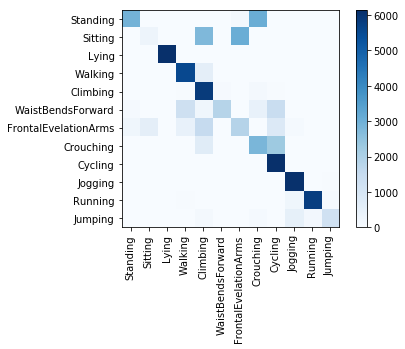

In [166]:
import matplotlib.pyplot as plt

columns = ['Standing', 'Sitting', 'Lying', 'Walking', 'Climbing', 'WaistBendsForward', 'FrontalEvelationArms'
          , 'Crouching','Cycling','Jogging','Running','Jumping']
confusion = metrics.confusion_matrix(y_test, y_test_trans_predicted)
print(metrics.classification_report(y_test, y_test_trans_predicted, target_names=columns))

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns, rotation='vertical')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], columns)
plt.colorbar()

plt.show()

# Feel free to discuss with me if you have any questions on my code.  Good luck with all of us!!!

# 20180329 Project background we did before submitting project proposal for your easy reference

http://archive.ics.uci.edu/ml/datasets/mhealth+dataset

Source:

Oresti Banos, Department of Computer Architecture and Computer Technology, University of Granada 
Rafael Garcia, Department of Computer Architecture and Computer Technology, University of Granada 
Alejandro Saez, Department of Computer Architecture and Computer Technology, University of Granada 

Email to whom correspondence should be addressed: oresti '@' ugr.es (oresti.bl '@' gmail.com)

Data Set Information:

The MHEALTH (Mobile HEALTH) dataset comprises body motion and vital signs recordings for ten volunteers of diverse profile while performing several physical activities. Sensors placed on the subject's chest, right wrist and left ankle are used to measure the motion experienced by diverse body parts, namely, acceleration, rate of turn and magnetic field orientation. The sensor positioned on the chest also provides 2-lead ECG measurements, which can be potentially used for basic heart monitoring, checking for various arrhythmias or looking at the effects of exercise on the ECG. 

---------------------------------------------------------------------------------------------------------------------- 
DATASET SUMMARY: 
#Activities: 12 
#Sensor devices: 3 
#Subjects: 10 


EXPERIMENTAL SETUP 

The collected dataset comprises body motion and vital signs recordings for ten volunteers of diverse profile while performing 12 physical activities (Table 1). Shimmer2 [BUR10] wearable sensors were used for the recordings. The sensors were respectively placed on the subject's chest, right wrist and left ankle and attached by using elastic straps (as shown in the figure in attachment). The use of multiple sensors permits us to measure the motion experienced by diverse body parts, namely, the acceleration, the rate of turn and the magnetic field orientation, thus better capturing the body dynamics. The sensor positioned on the chest also provides 2-lead ECG measurements which are not used for the development of the recognition model but rather collected for future work purposes. This information can be used, for example, for basic heart monitoring, checking for various arrhythmias or looking at the effects of exercise on the ECG. All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity. 

Each session was recorded using a video camera. This dataset is found to generalize to common activities of the daily living, given the diversity of body parts involved in each one (e.g., frontal elevation of arms vs. knees bending), the intensity of the actions (e.g., cycling vs. sitting and relaxing) and their execution speed or dynamicity (e.g., running vs. standing still). The activities were collected in an out-of-lab environment with no constraints on the way these must be executed, with the exception that the subject should try their best when executing them. 

3) Dataset files
The data collected for each subject is stored in a different log file: 'mHealth_subject<SUBJECT_ID>.log'.
Each file contains the samples (by rows) recorded for all sensors (by columns).
The labels used to identify the activities are similar to the ones presented in Section 2 (e.g., the label for walking is '4').
The meaning of each column is detailed next:

Column 1: acceleration from the chest sensor (X axis)
Column 2: acceleration from the chest sensor (Y axis)
Column 3: acceleration from the chest sensor (Z axis)
Column 4: electrocardiogram signal (lead 1) 
Column 5: electrocardiogram signal (lead 2)
Column 6: acceleration from the left-ankle sensor (X axis)
Column 7: acceleration from the left-ankle sensor (Y axis)
Column 8: acceleration from the left-ankle sensor (Z axis)
Column 9: gyro from the left-ankle sensor (X axis)
Column 10: gyro from the left-ankle sensor (Y axis)
Column 11: gyro from the left-ankle sensor (Z axis)
Column 13: magnetometer from the left-ankle sensor (X axis)
Column 13: magnetometer from the left-ankle sensor (Y axis)
Column 14: magnetometer from the left-ankle sensor (Z axis)
Column 15: acceleration from the right-lower-arm sensor (X axis)
Column 16: acceleration from the right-lower-arm sensor (Y axis)
Column 17: acceleration from the right-lower-arm sensor (Z axis)
Column 18: gyro from the right-lower-arm sensor (X axis)
Column 19: gyro from the right-lower-arm sensor (Y axis)
Column 20: gyro from the right-lower-arm sensor (Z axis)
Column 21: magnetometer from the right-lower-arm sensor (X axis)
Column 22: magnetometer from the right-lower-arm sensor (Y axis)
Column 23: magnetometer from the right-lower-arm sensor (Z axis)
Column 24: Label (0 for the null class)

*Units: Acceleration (m/s^2), gyroscope (deg/s), magnetic field (local), ecg (mV)

In [66]:
# Import and alias Pandas
import pandas as pd

In [67]:
subject1 = pd.read_csv('mHealth_subject1.log', sep="\t", header=None)
subject1.columns = ["AccelerationChestX"
                , "AccelerationChestY"
                , "AccelerationChestZ"
                , "ElectrocardiogramLead1"
                , "ElectrocardiogramLead2"
                , "AccelerationAnkleX"
                , "AccelerationAnkleY"
                , "AccelerationAnkleZ"
                , "GyroAnkleX"
                , "GyroAnkleY"
                , "GyroAnkleZ"
                , "MagnetometerAnkleX"
                , "MagnetometerAnkleY"
                , "MagnetometerAnkleZ"
                , "AccelerationArmX"
                , "AccelerationArmY"
                , "AccelerationArmZ"
                , "GyroArmX"
                , "GyroArmY"
                , "GyroArmZ"
                , "MagnetometerArmX"
                , "MagnetometerArmY"
                , "MagnetometerArmZ"
                , "Label"
               ]



subject2 = pd.read_csv('mHealth_subject2.log', sep="\t", header=None)
subject2.columns = ["AccelerationChestX"
                , "AccelerationChestY"
                , "AccelerationChestZ"
                , "ElectrocardiogramLead1"
                , "ElectrocardiogramLead2"
                , "AccelerationAnkleX"
                , "AccelerationAnkleY"
                , "AccelerationAnkleZ"
                , "GyroAnkleX"
                , "GyroAnkleY"
                , "GyroAnkleZ"
                , "MagnetometerAnkleX"
                , "MagnetometerAnkleY"
                , "MagnetometerAnkleZ"
                , "AccelerationArmX"
                , "AccelerationArmY"
                , "AccelerationArmZ"
                , "GyroArmX"
                , "GyroArmY"
                , "GyroArmZ"
                , "MagnetometerArmX"
                , "MagnetometerArmY"
                , "MagnetometerArmZ"
                , "Label"
               ]



In [68]:
subject1.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [69]:
subject2.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
0,-9.8646,0.298600,1.6900,-0.25955,-0.146520,0.49965,-9.6680,1.5216,-0.47866,-0.53471,...,-4.6451,-8.2508,1.9208,-0.98039,-0.41889,0.18966,0.72891,1.07810,-0.357210,0
1,-9.7753,0.381060,1.6132,-0.12977,-0.058608,0.40572,-9.5801,1.4001,-0.48423,-0.54409,...,-4.7847,-8.2609,1.9099,-0.98039,-0.41889,0.18966,0.18670,0.71683,-0.725460,0
2,-9.6195,0.169430,1.7205,-0.10466,-0.037677,0.42741,-9.6488,1.4593,-0.48423,-0.54409,...,-4.4974,-8.3198,2.0215,-0.97647,-0.42094,0.20043,0.18855,0.90189,-0.366260,0
3,-9.7610,0.169380,1.5837,-0.11722,-0.037677,0.32193,-9.4522,1.3119,-0.48423,-0.54409,...,-4.6902,-8.4318,1.8180,-0.97647,-0.42094,0.20043,0.18677,0.72405,-0.003505,0
4,-9.8078,-0.013582,1.6514,-0.13815,-0.054422,0.46731,-9.6397,1.3769,-0.49165,-0.52345,...,-4.7595,-8.4420,1.7966,-0.97647,-0.42094,0.20043,0.74339,2.52610,-0.732410,0


In [70]:
subject1.tail()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
161275,-9.4032,0.46417,-3.2951,0.272110,-0.050235,2.1463,-9.2841,2.2864,-0.88868,-0.95497,...,-4.0618,4.61190,7.1889,-0.6549,0.54415,0.67672,40.180,14.3690,-29.304,0
161276,-9.5201,0.75136,-3.8482,-0.104660,-0.025118,2.0773,-9.5717,2.2401,-0.90353,-0.96998,...,-4.4840,5.07440,6.4412,-0.6549,0.54415,0.67672,26.901,-2.9295,-30.119,0
161277,-9.3682,1.23960,-3.0253,-0.138150,-0.079540,1.7497,-9.3127,2.3956,-0.90353,-0.96998,...,-3.1657,0.98528,7.5284,-0.6549,0.54415,0.67672,17.288,5.3308,-30.393,0
161278,-8.6702,1.18590,-3.0196,-0.066981,-0.050235,1.8910,-9.3342,2.2189,-0.90353,-0.96998,...,-1.0351,-0.85876,6.1237,-0.6549,0.54415,0.67672,17.430,19.5020,-28.727,0
161279,-8.7211,1.20560,-2.0073,-0.012559,0.025118,2.3099,-9.2537,2.3521,-0.90909,-0.97186,...,-2.9315,-1.33840,5.1622,-0.6549,0.54415,0.67672,16.535,19.7790,-20.084,0


In [71]:
subject1.describe()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
count,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,...,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000
mean,-8.737671,0.186275,-0.645707,-0.007960,-0.035226,1.229914,-9.667029,-1.650613,0.010649,-0.663745,...,-4.178516,-4.873407,2.174713,-0.405350,-0.307315,0.312170,0.491517,0.550921,-0.231137,1.352356
std,3.806288,1.453274,3.740042,0.504334,0.643813,4.671081,4.064311,5.030605,0.495378,0.322115,...,4.316094,6.294977,3.620740,0.482499,0.657173,0.537174,26.486971,32.263002,62.555109,2.981766
min,-22.303000,-17.430000,-17.906000,-7.321800,-8.619600,-22.075000,-19.619000,-19.373000,-1.549200,-2.189500,...,-22.173000,-18.932000,-18.228000,-1.702000,-2.164300,-1.234900,-268.690000,-363.900000,-697.160000,0.000000
25%,-9.832900,-0.380693,-2.824350,-0.188380,-0.205130,0.095848,-10.066000,-3.288900,-0.372910,-0.848030,...,-6.267425,-9.271700,0.170480,-0.758820,-0.767970,-0.163790,-5.458975,-10.782000,-13.399000,0.000000
50%,-9.330700,0.252830,-0.316040,-0.025118,-0.025118,1.785900,-9.570500,-0.711750,-0.161410,-0.741090,...,-3.572100,-7.269950,1.478000,-0.505880,-0.587270,0.400860,0.362590,0.352170,-0.369920,0.000000
75%,-8.020800,0.770090,1.665425,0.154890,0.163270,2.643100,-9.025600,0.649125,0.500930,-0.596620,...,-1.819600,-0.063443,4.387400,-0.129410,0.223820,0.775860,6.048675,10.905250,12.793000,0.000000
max,18.960000,20.713000,24.084000,5.450500,8.519100,20.054000,21.161000,25.015000,1.870100,1.525300,...,19.565000,21.914000,25.194000,1.162700,1.556500,2.750000,212.270000,334.980000,629.950000,12.000000


In [72]:
subject2.describe()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
count,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,...,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000,130561.000000
mean,-8.858501,-0.187425,0.317355,-0.005755,0.008773,1.203538,-9.673908,-1.947817,-0.145236,-0.664777,...,-4.248543,-4.827263,3.290395,-0.384279,-0.472784,0.206604,0.020797,1.029566,-0.040666,1.687395
std,3.601440,1.432580,3.519939,0.486367,0.365845,3.340788,3.987678,5.387654,0.455282,0.289222,...,4.448131,5.972981,3.366704,0.473945,0.593786,0.573712,22.465271,29.653227,66.662952,3.238466
min,-22.295000,-19.659000,-17.906000,-4.533800,-5.965500,-22.074000,-19.590000,-19.363000,-1.692000,-2.949300,...,-22.014000,-18.867000,-18.222000,-1.684300,-1.975400,-2.689700,-284.870000,-358.480000,-601.630000,0.000000
25%,-9.870800,-0.890940,-1.008000,-0.192570,-0.142330,0.012841,-10.299000,-4.063900,-0.521340,-0.827390,...,-6.452700,-8.919300,1.434100,-0.774510,-0.946610,-0.318970,-7.810200,-8.397800,-14.314000,0.000000
50%,-9.398500,-0.212560,0.881130,-0.087912,-0.033490,0.787790,-9.685900,-1.115100,-0.315400,-0.733580,...,-3.231800,-6.739000,2.901600,-0.449020,-0.601640,0.133620,0.183140,0.329140,-0.359150,0.000000
75%,-8.219300,0.419610,1.852200,0.046049,0.096285,2.183400,-8.857700,0.690660,0.257880,-0.602250,...,-2.004800,0.202710,5.397400,-0.054902,-0.119100,0.846980,7.727000,9.471700,13.170000,1.000000
max,16.526000,20.825000,16.283000,5.124000,4.198800,20.024000,20.842000,24.544000,1.484200,1.677300,...,19.706000,21.827000,24.524000,1.074500,1.225900,1.310300,240.440000,336.220000,506.320000,12.000000


In [73]:
subject1.dtypes

AccelerationChestX        float64
AccelerationChestY        float64
AccelerationChestZ        float64
ElectrocardiogramLead1    float64
ElectrocardiogramLead2    float64
AccelerationAnkleX        float64
AccelerationAnkleY        float64
AccelerationAnkleZ        float64
GyroAnkleX                float64
GyroAnkleY                float64
GyroAnkleZ                float64
MagnetometerAnkleX        float64
MagnetometerAnkleY        float64
MagnetometerAnkleZ        float64
AccelerationArmX          float64
AccelerationArmY          float64
AccelerationArmZ          float64
GyroArmX                  float64
GyroArmY                  float64
GyroArmZ                  float64
MagnetometerArmX          float64
MagnetometerArmY          float64
MagnetometerArmZ          float64
Label                       int64
dtype: object

In [74]:
subject2.dtypes

AccelerationChestX        float64
AccelerationChestY        float64
AccelerationChestZ        float64
ElectrocardiogramLead1    float64
ElectrocardiogramLead2    float64
AccelerationAnkleX        float64
AccelerationAnkleY        float64
AccelerationAnkleZ        float64
GyroAnkleX                float64
GyroAnkleY                float64
GyroAnkleZ                float64
MagnetometerAnkleX        float64
MagnetometerAnkleY        float64
MagnetometerAnkleZ        float64
AccelerationArmX          float64
AccelerationArmY          float64
AccelerationArmZ          float64
GyroArmX                  float64
GyroArmY                  float64
GyroArmZ                  float64
MagnetometerArmX          float64
MagnetometerArmY          float64
MagnetometerArmZ          float64
Label                       int64
dtype: object

2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

In [75]:
subject1.Label.unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5], dtype=int64)

# Remove Label = 0 that does not belong to any specific movement

In [76]:
subject1 = subject1[subject1['Label'] != 0]

subject2 = subject2[subject2['Label'] != 0]

In [77]:
subject1.Label.unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5], dtype=int64)

In [78]:
subject2.Label.unique()

array([ 5,  1,  2,  3,  4,  6,  7,  8, 10, 11, 12,  9], dtype=int64)

# A class from web to implement simple DTW (comparing two non-multivariate time series)

In [79]:
# -*- coding: utf-8 -*-
# An pure python implemetation of Dynamic Time Warpping
# http://en.wikipedia.org/wiki/Dynamic_time_warping


class Dtw(object):
    def __init__(self, seq1, seq2, distance_func=None):
        '''
        seq1, seq2 are two lists,
        distance_func is a function for calculating
        the local distance between two elements.
        '''
        self._seq1 = seq1
        self._seq2 = seq2
        self._distance_func = distance_func if distance_func else lambda: 0
        self._map = {(-1, -1): 0.0}
        self._distance_matrix = {}
        self._path = []

    def get_distance(self, i1, i2):
        ret = self._distance_matrix.get((i1, i2))
        if not ret:
            ret = self._distance_func(self._seq1[i1], self._seq2[i2])
            self._distance_matrix[(i1, i2)] = ret
        return ret

    def calculate_backward(self, i1, i2):
        '''
        Calculate the dtw distance between
        seq1[:i1 + 1] and seq2[:i2 + 1]
        '''
        if self._map.get((i1, i2)) is not None:
            return self._map[(i1, i2)]

        if i1 == -1 or i2 == -1:
            self._map[(i1, i2)] = float('inf')
            return float('inf')

        min_i1, min_i2 = min((i1 - 1, i2), (i1, i2 - 1), (i1 - 1, i2 - 1),
                             key=lambda x: self.calculate_backward(*x))

        self._map[(i1, i2)] = self.get_distance(i1, i2) + \
            self.calculate_backward(min_i1, min_i2)

        return self._map[(i1, i2)]

    def get_path(self):
        '''
        Calculate the path mapping.
        Must be called after calculate()
        '''
        i1, i2 = (len(self._seq1) - 1, len(self._seq2) - 1)
        while (i1, i2) != (-1, -1):
            self._path.append((i1, i2))
            min_i1, min_i2 = min((i1 - 1, i2), (i1, i2 - 1), (i1 - 1, i2 - 1),
                                 key=lambda x: self._map[x[0], x[1]])
            i1, i2 = min_i1, min_i2
        return self._path

    def calculate(self):
        return self.calculate_backward(len(self._seq1) - 1,
                                       len(self._seq2) - 1)

# Simple Example how to use fastdtw

In [80]:
pip install fastdtw


The following command must be run outside of the IPython shell:

    $ pip install fastdtw

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [81]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [82]:
print(path)

[(0, 0), (1, 0), (2, 1), (3, 2), (4, 2)]


In [83]:
x

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [84]:
y

array([[2, 2],
       [3, 3],
       [4, 4]])

# Let's compare sitting (L2) and running (L11) of subject 1

In [85]:
subject1.describe()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
count,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,...,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000
mean,-7.723962,0.355158,0.060532,-0.033989,-0.094533,1.432490,-8.847285,-1.067822,0.154448,-0.609175,...,-4.438800,-5.461586,2.166517,-0.356850,-0.260511,0.497652,0.480847,1.091801,0.615245,6.200830
std,5.810161,1.677975,4.796392,0.613783,1.057165,4.922737,5.345102,6.275821,0.459179,0.448917,...,5.349371,6.309411,3.851329,0.475857,0.599100,0.426464,35.048305,31.787683,82.010412,3.271425
min,-22.303000,-17.430000,-17.906000,-4.563100,-8.619600,-22.075000,-19.619000,-19.373000,-1.424900,-2.189500,...,-22.148000,-18.932000,-18.228000,-1.137300,-2.164300,-0.700430,-268.690000,-340.500000,-594.510000,1.000000
25%,-9.764250,-0.173178,-2.870925,-0.192570,-0.217690,0.308673,-9.939175,-3.956475,-0.339520,-0.853660,...,-5.376300,-9.213900,0.329685,-0.758820,-0.698150,0.299570,-5.684075,-8.620550,-12.363750,3.000000
50%,-9.156550,0.314835,0.780465,-0.025118,-0.041863,1.970600,-9.511700,0.411005,0.382190,-0.759850,...,-3.201950,-7.412450,1.718550,-0.501960,-0.548250,0.536640,0.360770,0.354020,-0.360870,6.000000
75%,-6.558125,0.643925,2.350150,0.142330,0.146520,2.885000,-7.818200,0.997275,0.517630,-0.590990,...,-1.928825,-2.172225,4.440450,-0.062745,0.295690,0.795260,4.687000,9.169675,13.038000,9.000000
max,18.770000,20.713000,19.088000,4.764000,5.358500,20.024000,21.161000,25.015000,1.591800,0.677300,...,19.565000,21.838000,25.194000,0.921570,1.092400,1.170300,210.220000,295.180000,541.600000,12.000000


In [86]:
s1_sitting = subject1[subject1['Label']==2].drop(['Label'], axis = 1)

In [87]:
s1_sitting.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
12800,-9.6402,0.190240,2.6487,-0.004186,0.012559,0.34210,-9.8325,0.90763,0.49536,-0.84991,...,-0.44769,-5.2331,-7.1219,3.8106,0.16863,-0.71869,0.39224,0.36440,0.53362,-0.720070
12801,-9.5265,0.063759,2.2794,0.004186,0.012559,0.31347,-9.9105,1.02840,0.51020,-0.86116,...,-0.73287,-4.9591,-7.3026,3.7390,0.16863,-0.71869,0.39224,0.72714,0.90023,0.005541
12802,-9.6396,0.163440,2.2989,0.020931,0.016745,0.24619,-9.5366,0.79647,0.51020,-0.86116,...,-0.74557,-5.0152,-7.4833,3.6675,0.18235,-0.72074,0.41379,0.72899,1.08530,0.364740
12803,-9.2064,0.216650,2.4616,0.000000,-0.012559,0.27723,-9.5161,0.86030,0.51020,-0.86116,...,-0.74014,-5.2620,-7.3515,3.8512,0.18235,-0.72074,0.41379,0.72528,0.71516,-0.353660
12804,-9.6653,0.434410,2.4496,-0.029304,-0.058608,0.34066,-9.7139,0.88229,0.51020,-0.86116,...,-0.72744,-5.4266,-7.4131,3.6918,0.18235,-0.72074,0.41379,0.89936,0.16905,-0.344710


In [88]:
s1_running = subject1[subject1['Label']==11].drop(['Label'], axis = 1)

In [89]:
s1_running.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
98816,-6.8405,1.1151,0.8372,-0.69492,-1.7206,-3.95080,-19.1540,12.2940,0.59740,-0.74109,...,14.358,-19.67000,1.2327,-3.73000,-0.78431,-0.48665,0.58405,6.0901,124.2700,73.969
98817,-2.3256,1.6357,1.7788,-0.68655,-1.4108,9.41860,-11.6420,-15.6960,0.59740,-0.74109,...,34.618,-13.87000,6.6378,0.77981,-0.78431,-0.48665,0.58405,21.9650,95.9980,111.750
98818,5.1427,3.9738,1.7050,-1.84200,-2.4113,19.52100,-6.9617,-12.0070,0.59740,-0.74109,...,44.492,-9.19500,11.6860,3.60510,-0.78431,-0.48665,0.58405,38.3520,47.0350,132.070
98819,7.7713,4.3640,-3.3757,-2.49500,-3.2988,-2.53520,-9.3031,-1.5947,0.51763,-0.78612,...,70.256,-5.13840,14.9990,3.94790,-0.94510,-0.35729,0.38578,41.3690,7.6148,149.490
98820,5.0924,5.9866,-7.7138,-1.92990,-3.7300,0.75023,-19.1470,11.9980,0.51763,-0.78612,...,68.536,-0.97921,15.0400,4.96030,-0.94510,-0.35729,0.38578,40.4200,2.5166,165.040


In [90]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [91]:
distance, path = fastdtw(s1_sitting, s1_running, dist=euclidean)

In [92]:
print(distance)

913759.2893723054


# Sitting and running are two different movement so it is expected to have longest distance 914254

# Let's compare jogging (L10) and running (L11) of subject 1

In [93]:
subject1.describe()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ,Label
count,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,...,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000,35174.000000
mean,-7.723962,0.355158,0.060532,-0.033989,-0.094533,1.432490,-8.847285,-1.067822,0.154448,-0.609175,...,-4.438800,-5.461586,2.166517,-0.356850,-0.260511,0.497652,0.480847,1.091801,0.615245,6.200830
std,5.810161,1.677975,4.796392,0.613783,1.057165,4.922737,5.345102,6.275821,0.459179,0.448917,...,5.349371,6.309411,3.851329,0.475857,0.599100,0.426464,35.048305,31.787683,82.010412,3.271425
min,-22.303000,-17.430000,-17.906000,-4.563100,-8.619600,-22.075000,-19.619000,-19.373000,-1.424900,-2.189500,...,-22.148000,-18.932000,-18.228000,-1.137300,-2.164300,-0.700430,-268.690000,-340.500000,-594.510000,1.000000
25%,-9.764250,-0.173178,-2.870925,-0.192570,-0.217690,0.308673,-9.939175,-3.956475,-0.339520,-0.853660,...,-5.376300,-9.213900,0.329685,-0.758820,-0.698150,0.299570,-5.684075,-8.620550,-12.363750,3.000000
50%,-9.156550,0.314835,0.780465,-0.025118,-0.041863,1.970600,-9.511700,0.411005,0.382190,-0.759850,...,-3.201950,-7.412450,1.718550,-0.501960,-0.548250,0.536640,0.360770,0.354020,-0.360870,6.000000
75%,-6.558125,0.643925,2.350150,0.142330,0.146520,2.885000,-7.818200,0.997275,0.517630,-0.590990,...,-1.928825,-2.172225,4.440450,-0.062745,0.295690,0.795260,4.687000,9.169675,13.038000,9.000000
max,18.770000,20.713000,19.088000,4.764000,5.358500,20.024000,21.161000,25.015000,1.591800,0.677300,...,19.565000,21.838000,25.194000,0.921570,1.092400,1.170300,210.220000,295.180000,541.600000,12.000000


In [94]:
s1_jogging = subject1[subject1['Label']==10].drop(['Label'], axis = 1)

In [95]:
s1_jogging.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
88064,-14.96600,-0.18538,1.551700,-0.393510,0.016745,2.19350,-18.3680,-5.1361,0.56772,-0.80300,...,0.35361,-17.72000,9.5017,-1.82700,-0.88824,0.45380,0.46767,54.650,7.2339,88.385
88065,-11.56100,0.25033,0.780420,-0.230250,0.066981,-1.19530,-19.1450,10.3020,0.56772,-0.80300,...,2.55230,-13.69600,8.3210,1.10360,-0.88824,0.45380,0.46767,54.110,-28.8990,86.209
88066,-7.67070,1.21330,-0.722380,-0.050235,0.184200,-0.55877,-14.5430,7.1319,0.56772,-0.80300,...,6.42650,-8.59260,7.3165,0.64707,-0.86863,0.56879,0.32759,54.594,-52.2650,73.095
88067,-3.63120,1.76120,-0.967800,0.033490,0.313970,4.26030,-13.1310,5.7611,0.56772,-0.80300,...,11.79500,-4.21780,7.3348,0.48132,-0.86863,0.56879,0.32759,52.739,-58.2490,53.623
88068,0.40054,2.19520,0.071253,0.113030,0.485610,6.76670,-8.5679,-3.3295,0.55844,-0.80863,...,10.11200,-0.86095,5.4355,0.55303,-0.86863,0.56879,0.32759,48.762,-60.9670,31.910


In [96]:
s1_running = subject1[subject1['Label']==11].drop(['Label'], axis = 1)

In [97]:
s1_running.head()

,AccelerationChestX,AccelerationChestY,AccelerationChestZ,ElectrocardiogramLead1,ElectrocardiogramLead2,AccelerationAnkleX,AccelerationAnkleY,AccelerationAnkleZ,GyroAnkleX,GyroAnkleY,...,MagnetometerAnkleZ,AccelerationArmX,AccelerationArmY,AccelerationArmZ,GyroArmX,GyroArmY,GyroArmZ,MagnetometerArmX,MagnetometerArmY,MagnetometerArmZ
98816,-6.8405,1.1151,0.8372,-0.69492,-1.7206,-3.95080,-19.1540,12.2940,0.59740,-0.74109,...,14.358,-19.67000,1.2327,-3.73000,-0.78431,-0.48665,0.58405,6.0901,124.2700,73.969
98817,-2.3256,1.6357,1.7788,-0.68655,-1.4108,9.41860,-11.6420,-15.6960,0.59740,-0.74109,...,34.618,-13.87000,6.6378,0.77981,-0.78431,-0.48665,0.58405,21.9650,95.9980,111.750
98818,5.1427,3.9738,1.7050,-1.84200,-2.4113,19.52100,-6.9617,-12.0070,0.59740,-0.74109,...,44.492,-9.19500,11.6860,3.60510,-0.78431,-0.48665,0.58405,38.3520,47.0350,132.070
98819,7.7713,4.3640,-3.3757,-2.49500,-3.2988,-2.53520,-9.3031,-1.5947,0.51763,-0.78612,...,70.256,-5.13840,14.9990,3.94790,-0.94510,-0.35729,0.38578,41.3690,7.6148,149.490
98820,5.0924,5.9866,-7.7138,-1.92990,-3.7300,0.75023,-19.1470,11.9980,0.51763,-0.78612,...,68.536,-0.97921,15.0400,4.96030,-0.94510,-0.35729,0.38578,40.4200,2.5166,165.040


In [98]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [99]:
distance, path = fastdtw(s1_jogging, s1_running, dist=euclidean)

In [100]:
print(distance)

697478.9299103403


# Jogging and running are two movement with similarity.  Hence, it is expected that the distance should be shorter than the distance between sitting and running

# Let's compare sitting (L2) of subject 1 and subject 2


In [101]:
s1_sitting = subject1[subject1['Label']==2].drop(['Label'], axis = 1)

In [102]:
s2_sitting = subject2[subject2['Label']==2].drop(['Label'], axis = 1)

In [103]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [104]:
distance, path = fastdtw(s1_sitting, s2_sitting, dist=euclidean)

In [105]:
print(distance)

33632.861330905194


# The same movement (sitting) from two different subjects has the shortest distance as expected

# Python packages

# https://github.com/pierre-rouanet/dtw

# https://pypi.python.org/pypi/fastdtw/0.2.2

# Looking forward

# I find it difficult to interpret the results (at least the methodology part) when it comes to multivariate time series problems like our case study does.  So if you guys really consider to present DTW as our topic, we may need to pay a lot of effort into explaining how DTW works on multivariate problems.  